## **Bootcamp: Ciencia de Datos e Inteligencia Artificial**
## **Proyecto del Módulo 7: Técnicas avanzadas para ciencia de datos y empleabilidad**

Hola, ya es el último proyecto, has avanzado y aprendido mucho hasta acá. ¡Muchas felicidades!

Es hora de poner en práctica todo lo que hemos aprendido a lo largo de nuestra travesía.

Lee el proyecto y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que lo concluyas de manera sobresaliente.

¡Éxito!

# Proyecto

1. Selecciona uno de los siguientes *datasets*:
  - Imágenes de rayos X de pecho para detectar neumonía: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
  - *Reviews* de aplicaciones de la Google Play Store: https://www.kaggle.com/datasets/lava18/google-play-store-apps
  - Estadísticas demográficas de los ganadores del premio Oscar de la Academia: https://www.kaggle.com/datasets/fmejia21/demographics-of-academy-awards-oscars-winners
  - Aspiraciones profesionales de la generación Z: https://www.kaggle.com/datasets/kulturehire/understanding-career-aspirations-of-genz

Cada uno representa un *dataset*, un problema y una forma diferente de abordarlo. Tu tarea es identificar las técnicas y modelos que podrías usar para tu proyecto.

2. Debes hacer un análisis exploratorio y limpieza de los datos. Usa las ténicas que creas convenientes.

3. Entrena el modelo de *Machine Learning*, procesamiento de lenguaje natural o red neuronal que creas adecuado.

4. Genera por lo menos dos gráficas y dos métricas de rendimiento; explica las puntuaciones de rendimiento que amerite tu problema. Todas las gráficas de rendimiento que realices deben tener leyendas, colores y títulos personalizados por ti.

  - Además, antes de subir el modelo a "producción", deberás realizar un proceso de ensambles (*ensemblings*) y de ajuste de hiperparámetros o *tuning* para intentar mejorar la precisión y disminuir la varianza de tu modelo.

5. Construye una API REST en la que cualquier usuario pueda mandar datos y que esta misma devuelva la predicción del modelo que has hecho. La API debe estar en la nube, ya sea en un servicio como Netlify o Ngrok, para que pueda ser consultada desde internet.

6. Genera una presentación del problema y del modelo de solución que planteas. Muestra gráficas, datos de rendimiento y explicaciones. Esta presentación debe estar enfocada a personas que no sepan mucho de ciencia de datos e inteligencia artificial.

7. **Solamente se recibirán trabajos subidos a tu cuenta de GitHub con un README.md apropiado que explique tu proyecto**.

## Criterios de evaluación

| Actividad | Porcentaje | Observaciones | Punto parcial
| -- | -- | -- | -- |
| Actividad 1. Limpieza y EDA | 20 | Realiza todas las tareas necesarias para hacer el EDA y la limpieza correcta, dependiendo de la problemática. Debes hacer como mínimo el análisis de completitud, escalamiento (si aplica) y tokenización (si aplica). | Realizaste solo algunas tareas de exploración y limpieza y el modelo se muestra aún con oportunidad de completitud, escalamiento y/o mejora. |
| Actividad 2. Entrenamiento del modelo | 20 | Elige el modelo y algoritmo adecuados para tu problema, entrénalo con los datos ya limpios y genera algunas predicciones de prueba. | No has realizado predicciones de prueba para tu modelo de ML y/o tu modelo muestra una precisión menor al 60 %. |
| Actividad 3. Graficación y métricas | 20 | Genera por lo menos dos gráficas y dos muestras de métricas que permitan visualizar el rendimiento y precisión del modelo que construiste. Además, realizaste los procesos de *tuning* y ensambles adecuados para tu problema. | Las gráficas no tienen leyendas y colores customizados, solo muestras una gráfica o no realizaste el *tuning* de hiperparámetros.
| Actividad 4. API REST | 20 | Generaste con éxito un *link* público en el que, por método POST, se puede mandar información y la API REST devuelve una predicción junto con el porcentaje de confianza de esta misma. | N/A
| Actividad 5. Presentación | 20 | Genera una presentación en la que establezcas como mínimo: el problema, proceso de solución, metodologías usadas, gráficas de rendimiento, demostración del modelo y aprendizajes obtenidos. Debes redactarla con términos que pueda entender cualquier persona, no solo científicos de datos. | La presentación no expone con claridad o en términos coloquiales el proceso de creación del modelo, sus ventajas y muestras de rendimiento.

**Mucho éxito en tu camino como Data Scientist.**

# Librerias a utilizar en el proyecto

In [99]:
#Para conectar con el Drive de google
#from google.colab import drive
#drive.mount('/content/drive')

In [100]:
#Para quitar posibles advertencias
import warnings
warnings.filterwarnings('ignore')

# Procesamiento de datos
import pandas as pd
import numpy as np
import re
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

#modelos de clasificacion

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Para graficas y visualizacion de datos

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#Extraccion de los modelos

import joblib

# Descripción Inicial, limpieza del DataSet de Google

Este dataset de informacion y comentarios de las apps de google es muy util para obtener informacion sobre apps, es decir que con esta informacion puedes guiar el proceso de creacion de una app por buen camino, considerando valores genericos como pueden ser el numero de reviews, instalaciones, calificaciones, categoria de la app, entre otros tipos de datos. La intencion de esto es analizar la informacion y generar un modelo que interprete bien la tendencia de que tipo de apps son mejores e intentar clasificar estas mismas.

Para la informacion de este dataframe, se revisara y enfocara en Analizar cada aspecto dentro de ellos buscando informacion tanto visual como descrita, por cada tipo de variable dentro del dataframe, se planea responder a las siguientes preguntas:

- ¿Cuál categoría tiene el mayor número de aplicaciones?
- ¿Cuáles son las 5 aplicaciones mejor calificadas?
- ¿Cuáles son las 5 aplicaciones peor calificadas?
- ¿Cuál categoría tiene la mayor cantidad de aplicaciones mejor calificadas?
- ¿Cuál categoría tiene la aplicación con el mayor número de reseñas?
- ¿Cuál es el tamaño promedio de las aplicaciones con el mayor número de instalaciones, calificaciones y reseñas?
- ¿Cuál es la aplicación de pago más cara y cuántas reseñas, instalaciones y calificaciones tiene?
- ¿Cuáles son las aplicaciones con el mayor número de instalaciones?
- ¿Qué calificación de contenido tiene el mayor número de instalaciones, reseñas y las mejores calificaciones?
- ¿Cuáles aplicaciones tienen el mayor número de instalaciones en la categoría "Juegos"?
- ¿Cuál es la calificación promedio por categoría de aplicaciones?
- ¿Qué categoría de aplicaciones tiene el tamaño promedio más grande?
- ¿Qué categorías tienen el mayor porcentaje de aplicaciones de pago?

Hay que considerar que informacion fue obtenida en año 2018 por lo que estara algo desactualizado si se compara con aplicaciones de la actualidad.

In [101]:
path1 = r"\Users\MOONLAB PC\Desktop\Programacion\Notebooks\Proyecto 7\DataSet\googleplaystore.csv"


Se genera una variable que contienen la direccion en donde se encuentra ubicado el dataset.

In [102]:
df_gg = pd.read_csv(path1) #Dataset de informacion de las aplicaciones de google

Se importa el dataset bajo el nombre df_gg que contiene informacion de apps

In [103]:
#Revisamos superficialmente el dataset
df_gg

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


Como se puede pareciar en la tabla superior, el dataset de informacion de apps, tiene 10841 filas y 13 columnas, mostrando algunas filas y los posibles datos de cada fila.

Estos tipos de datos son, segun su columna:

- App: Nombre de la aplicacion en la google play store (str)
- Category: Categoria en la que la aplicacion esta etiquetada (str)
- Rating: Es el promedio de Calificacion de todas las personas que le han puesto nota a la App (float)
- Reviews: Cantidad de comentarios y calificaciones que tiene la app (int)
- Size: Tamaño o Peso en Mb, Kb, b u otros que contenga la app (int)
- Installs : Cantidad de Instalaciones o descargas que tiene la app (int)
- Type: Define si la aplicacion es de pago o si es gratuita (str)
- Price: Precio que tiene la app en caso de ser de pago (float)
- Content Rating: define el tipo de publico al que esta destinada la app. (str)
- Genres : Categorias mas especificas que tiene la app (str)
- Last Updated: Define la fecha en la que la aplicacion fue actualizada por ultima vez
- Current Ver: Define la version que tiene la aplicacion.
- Android Ver: Define la version de Android para la cual esta hecha la aplicacion.

Como este analisis se enfocara en la informacion respecto a reviews y calificaciones, dejaremos de lado las columnas con informacion respecto a las versiones de la app como tambien su version de Android

Se revisa informacion general de las columnas del dataset

In [104]:
#Se revisa la informacion general de las columnas, valores no nulos y tipo de datos
df_gg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Aqui hay informacion importante, como lo son la cantidad de valores no nulos y tambien los tipos de datos que tienen las columnas, como definimos anteriormente, hay columnas con tipo de datos numericos pero en la informacion superior tienen el tipo de dato "object", eso quiere decir que a varias columnas hay que transformarlas para que tengan el tipo de dato correcto.

In [105]:
#Se revisa su completitud y duplicados
print("\nLos valores de completitud en procentaje de las columnas son:\n\n", str((df_gg.notnull().sum()/df_gg.shape[0])*100))
print("\nLa cantidad de filas duplicadas son:", str(df_gg.duplicated().sum()))


Los valores de completitud en procentaje de las columnas son:

 App               100.000000
Category          100.000000
Rating             86.403468
Reviews           100.000000
Size              100.000000
Installs          100.000000
Type               99.990776
Price             100.000000
Content Rating     99.990776
Genres            100.000000
Last Updated      100.000000
Current Ver        99.926206
Android Ver        99.972327
dtype: float64

La cantidad de filas duplicadas son: 483


La completitud se refiere a la cantidad de filas y columnas que contienen informacion no nula, es decir que tienen datos en relacion a la cantidad total de filas, por lo que si una columna tiene un 86%, le falta un 14% de datos en sus 10841 filas.

## Limpieza del dataset de Apps

Como se puede apreciar una cantidad de nulos bastante elevada en la columna Rating (14%), por lo que se procede a quitarlos del dataframe como tambien las filas duplicadas, esto se aplicara a todas las filas con datos nulos y/o duplicados.

In [106]:
#Se eliminan los nulos y duplicados, para posteriormente ordenar el index
df_gg.dropna(inplace=True)
df_gg.drop_duplicates(inplace=True)
df_gg.reset_index(drop=True, inplace=True)

In [107]:
#Se revisa su informacion general, completitud y duplicados
df_gg.info()
print("\nLos valores de completitud en porcentaje de las columnas son:\n\n", str((df_gg.notnull().sum()/df_gg.shape[0])*100))
print("\nLa cantidad de filas duplicadas son:", str(df_gg.duplicated().sum()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8886 entries, 0 to 8885
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8886 non-null   object 
 1   Category        8886 non-null   object 
 2   Rating          8886 non-null   float64
 3   Reviews         8886 non-null   object 
 4   Size            8886 non-null   object 
 5   Installs        8886 non-null   object 
 6   Type            8886 non-null   object 
 7   Price           8886 non-null   object 
 8   Content Rating  8886 non-null   object 
 9   Genres          8886 non-null   object 
 10  Last Updated    8886 non-null   object 
 11  Current Ver     8886 non-null   object 
 12  Android Ver     8886 non-null   object 
dtypes: float64(1), object(12)
memory usage: 902.6+ KB

Los valores de completitud en porcentaje de las columnas son:

 App               100.0
Category          100.0
Rating            100.0
Reviews           100.0
Si

La infomacion entregada indica que de los 10841 registros que poseia el df, quedaron 8886, esto debido a que se eliminaron la informacion nula y duplicados. por lo que genero que cada columna lograra el total de la completitud, es decir que todas las columnas tienen los valores no nulos en sus respectivos registros.

In [108]:
df_gg

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8881,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
8882,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
8883,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
8884,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# Analisis y transformacion de datos por Variable

## Columna "Rating"

Ahora procederemos a analizar y transformar cada columna con sus posibles tipos de categorias o valores.

Empezando con la columna "Rating", esta columna sera nuetra columna objetivo, con esta misma variable la intencion es lograr clasificar las apps con el rango de etiquetas que posee, pero para ello, sera necesario convertir sus valores de flotantes a enteros.

In [109]:
df_gg["Rating"].value_counts().sort_index()

Rating
1.0      16
1.2       1
1.4       3
1.5       3
1.6       4
1.7       8
1.8       8
1.9      12
2.0      12
2.1       8
2.2      14
2.3      20
2.4      19
2.5      20
2.6      24
2.7      23
2.8      40
2.9      45
3.0      82
3.1      69
3.2      63
3.3     101
3.4     127
3.5     157
3.6     169
3.7     231
3.8     293
3.9     372
4.0     538
4.1     656
4.2     887
4.3    1016
4.4    1031
4.5     976
4.6     768
4.7     484
4.8     228
4.9      87
5.0     271
Name: count, dtype: int64

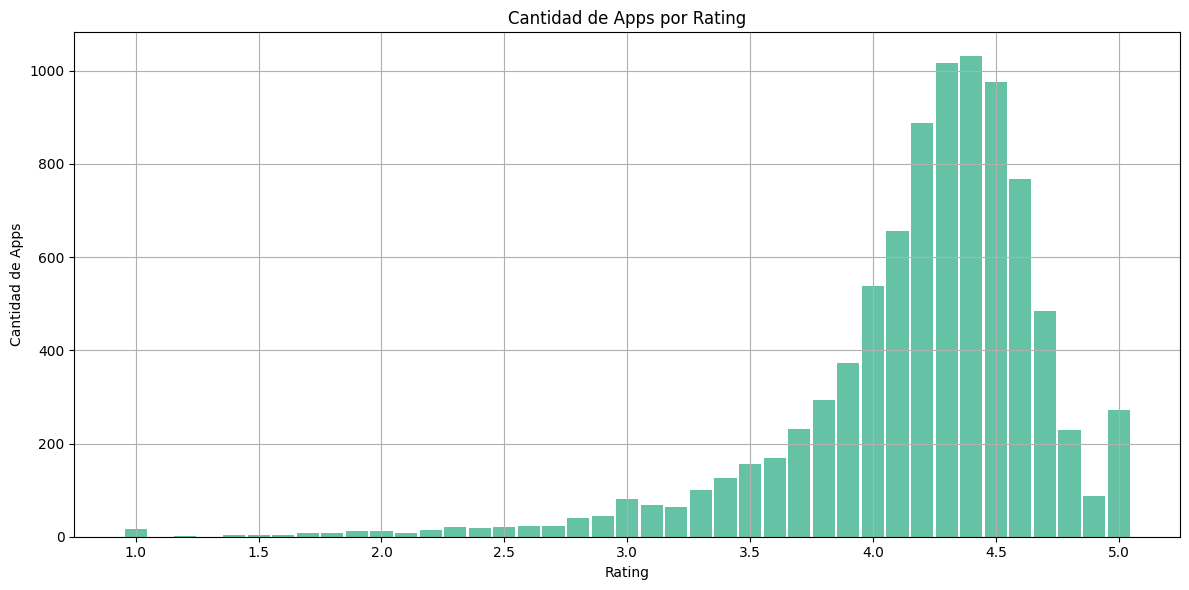

Rango Min del rating: 1.0 
Rango Max del rating: 5.0


In [110]:
#Grafica de cantidad de apps por Rating

etiqueta = df_gg['Rating'].value_counts().sort_index()
plt.figure(figsize=(12,6))
plt.bar(etiqueta.index, etiqueta, width= 0.09, align='center')
plt.title('Cantidad de Apps por Rating')
plt.xlabel('Rating')
plt.ylabel('Cantidad de Apps')
plt.grid(True)
plt.tight_layout()
plt.show()
print(f"Rango Min del rating: {df_gg['Rating'].min()} \nRango Max del rating: {df_gg['Rating'].max()}")


## Columna "App"

In [111]:
df_gg["App"].value_counts()

App
ROBLOX                              9
8 Ball Pool                         7
Bubble Shooter                      6
Helix Jump                          6
Zombie Catchers                     6
                                   ..
FR Calculator                       1
Sya9a Maroc - FR                    1
Fr. Mike Schmitz Audio Teachings    1
The SCP Foundation DB fr nn5n       1
Art Drawing Ideas                   1
Name: count, Length: 8190, dtype: int64

Con el codigo anterior podemos observar que hay aplicaciones que tiene el mismo nombre, por lo que se procede a revisar algunas de ellas

In [112]:
df_gg[df_gg["App"] == "ROBLOX"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1364,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1412,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1456,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1543,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1571,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1704,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1775,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1873,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
3891,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [113]:
df_gg[df_gg["App"] == "Zombie Catchers"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1404,Zombie Catchers,GAME,4.7,990491,75M,"10,000,000+",Free,0,Everyone,Action,"May 24, 2018",1.0.27,4.1 and up
1435,Zombie Catchers,GAME,4.7,990586,75M,"10,000,000+",Free,0,Everyone,Action,"May 24, 2018",1.0.27,4.1 and up
1599,Zombie Catchers,GAME,4.7,990723,75M,"10,000,000+",Free,0,Everyone,Action,"May 24, 2018",1.0.27,4.1 and up
1622,Zombie Catchers,GAME,4.7,990663,75M,"10,000,000+",Free,0,Everyone,Action,"May 24, 2018",1.0.27,4.1 and up
1673,Zombie Catchers,GAME,4.7,990796,75M,"10,000,000+",Free,0,Everyone,Action,"May 24, 2018",1.0.27,4.1 and up
3634,Zombie Catchers,GAME,4.7,989158,75M,"10,000,000+",Free,0,Everyone,Action,"May 24, 2018",1.0.27,4.1 and up


In [114]:
df_gg[df_gg["App"] == "Bubble Shooter"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1368,Bubble Shooter,GAME,4.5,148897,46M,"10,000,000+",Free,0,Everyone,Casual,"July 17, 2018",1.20.1,4.0.3 and up
1421,Bubble Shooter,GAME,4.5,148895,46M,"10,000,000+",Free,0,Everyone,Casual,"July 17, 2018",1.20.1,4.0.3 and up
1576,Bubble Shooter,GAME,4.5,148945,46M,"10,000,000+",Free,0,Everyone,Casual,"July 17, 2018",1.20.1,4.0.3 and up
1664,Bubble Shooter,GAME,4.5,148990,46M,"10,000,000+",Free,0,Everyone,Casual,"July 17, 2018",1.20.1,4.0.3 and up
1729,Bubble Shooter,FAMILY,4.4,59843,20M,"5,000,000+",Free,0,Everyone,Puzzle;Brain Games,"January 9, 2018",2.3.3122,2.3 and up
3302,Bubble Shooter,GAME,4.5,43576,50M,"5,000,000+",Free,0,Everyone,Arcade,"September 13, 2017",4.4,2.3 and up


Como en realidad siguen siendo las mismas aplicaciones solo que cambian las categorias y la cantidad de reviews, quizas debido a las diferencias de paises o bien a los creadores de cada app que usaron diferentes versiones del mismo juego como si fuera un juego distinto, se eliminaran los duplicados correspondientes solo a los nombres repetidos en la columna "App", de forma que se mantendra la fila menor con el mismo nombre.


In [115]:
#Se eliminan duplicados de la columna "App" para posteriormente ordenar el index y mostrar la cantidad de filas restantes
filas_duplicadas = df_gg[df_gg["App"].duplicated() == True].index
df_gg.drop(filas_duplicadas, inplace=True)
df_gg.reset_index(drop=True, inplace=True)
df_gg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8190 non-null   object 
 1   Category        8190 non-null   object 
 2   Rating          8190 non-null   float64
 3   Reviews         8190 non-null   object 
 4   Size            8190 non-null   object 
 5   Installs        8190 non-null   object 
 6   Type            8190 non-null   object 
 7   Price           8190 non-null   object 
 8   Content Rating  8190 non-null   object 
 9   Genres          8190 non-null   object 
 10  Last Updated    8190 non-null   object 
 11  Current Ver     8190 non-null   object 
 12  Android Ver     8190 non-null   object 
dtypes: float64(1), object(12)
memory usage: 831.9+ KB


In [116]:
#Se comprueba la eliminacion
df_gg[df_gg["App"] == "ROBLOX"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1273,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [117]:
#Se comprueba de forma general
df_gg["App"].value_counts()

App
iHoroscope - 2018 Daily Horoscope & Astrology         1
Photo Editor & Candy Camera & Grid & ScrapBook        1
Coloring book moana                                   1
U Launcher Lite – FREE Live Cool Themes, Hide Apps    1
Sketch - Draw & Paint                                 1
                                                     ..
ibis Paint X                                          1
FlipaClip - Cartoon animation                         1
350 Diy Room Decor Ideas                              1
Photo Designer - Write your name with shapes          1
3D Color Pixel by Number - Sandbox Art Coloring       1
Name: count, Length: 8190, dtype: int64

Con esto se confirma que ya solo hay un registro por cada aplicacion y nada de duplicados. Quedando un total de 8190 filas o mejor dicho Apps

## Columna "Category"

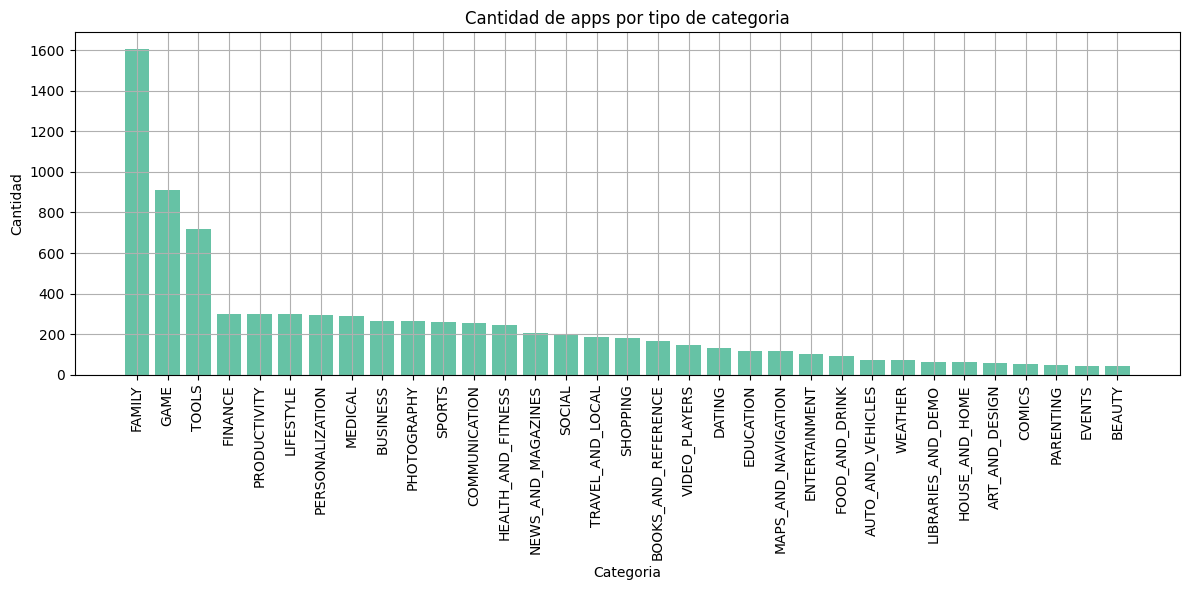

Categorias totales:  33


In [118]:
#Grafica de cantidad de apps por categoria

etiqueta = df_gg["Category"].value_counts()

plt.figure(figsize=(12,6))
plt.bar(etiqueta.index, etiqueta)
plt.xticks(rotation=90)
plt.title("Cantidad de apps por tipo de categoria")
plt.xlabel('Categoria')
plt.ylabel('Cantidad')
plt.grid(True)
plt.tight_layout()
plt.show()
print("Categorias totales: ", str(df_gg["Category"].value_counts().shape[0]))


En esta columna se muestra la informacion de las posibles categorias de las apps, siendo "FAMILY", "GAME" y "TOOLS" , las que tienen mayor cantidad.

In [119]:
#Con este codigo se revisa la informacion por categoria
df_gg.groupby('Category')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
ART_AND_DESIGN,60.0,4.376667,0.331083,3.4,4.100,4.4,4.700,5.0
AUTO_AND_VEHICLES,73.0,4.190411,0.543692,2.1,4.000,4.3,4.600,4.9
BEAUTY,42.0,4.278571,0.362603,3.1,4.000,4.3,4.575,4.9
BOOKS_AND_REFERENCE,169.0,4.344970,0.437649,2.7,4.100,4.5,4.600,5.0
BUSINESS,263.0,4.098479,0.659862,1.0,3.800,4.2,4.500,5.0
COMICS,54.0,4.181481,0.526317,2.8,3.900,4.4,4.500,5.0
COMMUNICATION,256.0,4.121484,0.470260,1.0,4.000,4.2,4.400,5.0
DATING,134.0,3.970149,0.637786,1.0,3.600,4.1,4.400,5.0
EDUCATION,118.0,4.364407,0.263612,3.5,4.200,4.4,4.600,4.9


Con la informacion de la tabla podemos decir que hay una cierta tendencia que algunas categorias tienen una peor calificacion general (revisando el promedio), pero siempre hay que considerar que no todas las categorias tienen las mismas cantidades, esto hace pensar que los valores estan sumamente bien distruidos en terminos de Rating y para nada dan una generalizacion o tendencia lo suficientemente clara.

## Columna "Reviews"

Reviews tiene valores numericos por lo que se procedera a definir su valores como enteros.

In [120]:
df_gg["Reviews"].value_counts()

Reviews
2        82
3        76
5        74
4        74
1        67
         ..
885       1
88486     1
603       1
1195      1
11788     1
Name: count, Length: 5319, dtype: int64

In [121]:
#Se transforman sus caracteres a numeros enteros
df_gg["Reviews"] = df_gg["Reviews"].astype(int)
df_gg["Reviews"].dtype

dtype('int64')

In [122]:
df_gg["Reviews"].describe()

count    8.190000e+03
mean     2.554354e+05
std      1.986309e+06
min      1.000000e+00
25%      1.260000e+02
50%      3.009500e+03
75%      4.391425e+04
max      7.815831e+07
Name: Reviews, dtype: float64

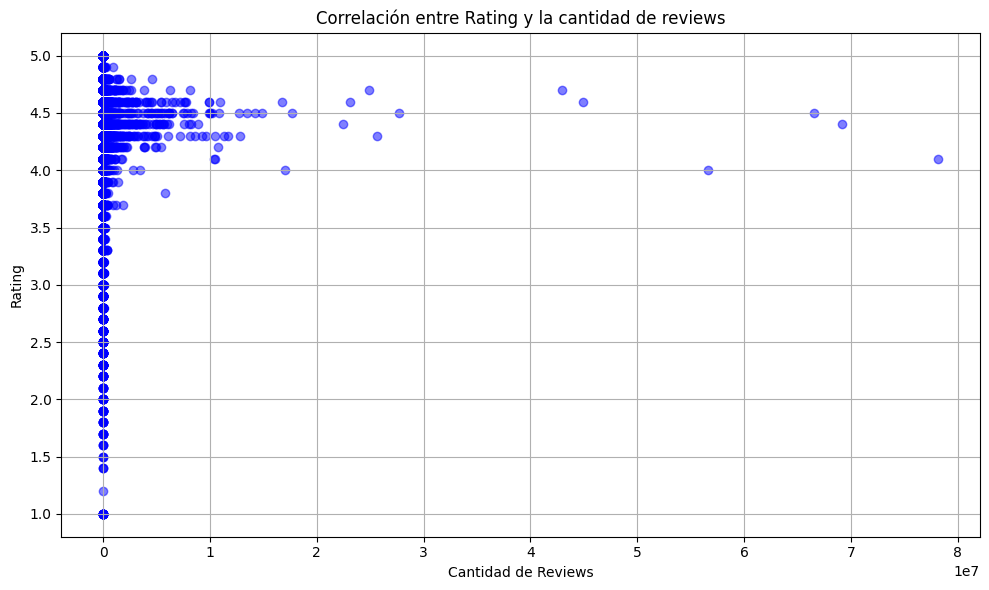

Valor minimo de Reviews: 1
Valor maximo de Reviews: 78158306

Cantidad de Apps con una cantidad de Reviews menores a 1000: 3392
Cantidad de Apps con una cantidad de Reviews entre 1000 a 10000: 1529
Cantidad de Apps con una cantidad de Reviews entre 10000 a 100000: 1822
Cantidad de Apps con una cantidad de Reviews entre 100000 a 1000000: 1098
Cantidad de Apps con una cantidad de Reviews entre 1000000 a 10000000: 319
Cantidad de Apps con una cantidad de Reviews entre 10000000 a 100000000: 30
Cantidad de Apps con una cantidad de Reviews mayor o igual a 1000: 4798


In [123]:
#Grafica de tipo scatter para revisar alguna posible correlacion 

rating = df_gg["Rating"]
reviews = df_gg["Reviews"]  # Asegúrate de que la columna de tamaño esté en megabytes

plt.figure(figsize=(10, 6))

# Graficar el scatter plot
plt.scatter(reviews, rating, alpha=0.5, color="blue")
plt.title("Correlación entre Rating y la cantidad de reviews")
plt.xlabel("Cantidad de Reviews")
plt.ylabel("Rating")
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Valor minimo de Reviews: {df_gg["Reviews"].min()}")
print(f"Valor maximo de Reviews: {df_gg["Reviews"].max()}")
print(f"\nCantidad de Apps con una cantidad de Reviews menores a 1000: {df_gg[df_gg["Reviews"] < 1000]["Reviews"].value_counts().sum()}")
print(f"Cantidad de Apps con una cantidad de Reviews entre 1000 a 10000: {df_gg[(df_gg["Reviews"] > 1000) & (df_gg["Reviews"] <= 10000 )]["Reviews"].value_counts().sum()}")
print(f"Cantidad de Apps con una cantidad de Reviews entre 10000 a 100000: {df_gg[(df_gg["Reviews"] > 10000) & (df_gg["Reviews"] <= 100000 )]["Reviews"].value_counts().sum()}")
print(f"Cantidad de Apps con una cantidad de Reviews entre 100000 a 1000000: {df_gg[(df_gg["Reviews"] > 100000) & (df_gg["Reviews"] <= 1000000 )]["Reviews"].value_counts().sum()}")
print(f"Cantidad de Apps con una cantidad de Reviews entre 1000000 a 10000000: {df_gg[(df_gg["Reviews"] > 1000000) & (df_gg["Reviews"] <= 10000000 )]["Reviews"].value_counts().sum()}")
print(f"Cantidad de Apps con una cantidad de Reviews entre 10000000 a 100000000: {df_gg[(df_gg["Reviews"] > 10000000) & (df_gg["Reviews"] <= 100000000)]["Reviews"].value_counts().sum()}")
print(f"Cantidad de Apps con una cantidad de Reviews mayor o igual a 1000: {df_gg[df_gg["Reviews"] >= 1000]["Reviews"].value_counts().sum()}")


## Columna "Size"

In [124]:
#Se revisan los valores de la columna Size
df_gg["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

En el caso de esta columna se aprecia que tiene valores numericos pero tambien tienen su denominacion de bits, como son "Megabyte", "Kilobyte" o bien una asignacion que comenta, "Varies with device", diciendo que el tamaño dependera del dispotivo donde se vaya a instalar.

Para poder analizar y trabajar con esta columna, se convertiran sus valores a numericos, defiendo primero que:

- 1 Megabyte = 1024 Kilobytes

- 1 Kilobyte = 1024 bytes

Los comentarios "Varies with device" se convertiran a valores nulos ya que no especifica el tamaño de la app.

In [125]:
#Funcion para convertir los valores de los tamaños de str a valores numericos en base a los valores en bytes anteriormente contados
def convert_size(size):
    if isinstance(size , str):
        if 'k' in size:
            return float(size.replace('k' , "")) * 1024
        elif 'M' in size:
            return float(size.replace('M' , "")) * 1024 * 1024
        elif 'Varies with device' in size:
            return np.nan
    return float(size) if isinstance(size, (int, float)) else np.nan   

# Funcion para convertir valores de bytes a Megabytes
def convert_b_Mb(size_b):
    size_M = size_b/(1024*1024)
    return round(size_M, 2)


In [126]:
#Convertimos los datos con la funcion anterior conver_size
df_gg["Size"] = df_gg["Size"].apply(convert_size)
df_gg["Size"].dtype

dtype('float64')

In [127]:
#Verificamos los datos
df_gg["Size"].unique()

array([1.99229440e+07, 1.46800640e+07, 9.12261120e+06, 2.62144000e+07,
       2.93601280e+06, 5.87202560e+06, 3.04087040e+07, 3.46030080e+07,
       3.25058560e+06, 2.93601280e+07, 1.25829120e+07, 2.09715200e+07,
       2.20200960e+07, 3.87973120e+07, 5.76716800e+06, 1.78257920e+07,
       4.08944640e+07, 3.25058560e+07, 4.40401920e+06, 2.41172480e+07,
       6.29145600e+06, 6.39631360e+06, 4.82344960e+06, 9.64689920e+06,
       5.45259520e+06, 1.15343360e+07, 2.51658240e+07,            nan,
       9.85661440e+06, 1.57286400e+07, 1.04857600e+07, 1.25829120e+06,
       2.72629760e+07, 8.38860800e+06, 8.28375040e+06, 5.87202560e+07,
       5.97688320e+07, 3.67001600e+07, 5.66231040e+07, 2.05824000e+05,
       3.77487360e+06, 5.97688320e+06, 9.01775360e+06, 2.51658240e+06,
       2.83115520e+07, 2.83115520e+06, 2.62144000e+06, 7.34003200e+06,
       1.67772160e+07, 3.56515840e+06, 9.33232640e+06, 4.08944640e+06,
       3.04087040e+06, 3.98458880e+07, 3.35544320e+07, 5.66231040e+06,
      

Se puede apreciar que el tamaño ahora esta en bytes y son valores muy grandes, por lo que se convertiran todos a valores en Megabytes, siendo valores mas pequeños y entendibles.

In [128]:
#Utilizamos la funcion convert_b_Mb para convertir de b a Mb
df_gg["Size_Mb"] = df_gg["Size"].apply(convert_b_Mb)
df_gg["Size_Mb"].dtype

dtype('float64')

Ahora usamos los datos convertidos para revisar alguna correlacion con las calificaciones de las aplicaciones, un pensamiento logico es que no influye el tamaño de los datos en si una aplicacion es buena o no.

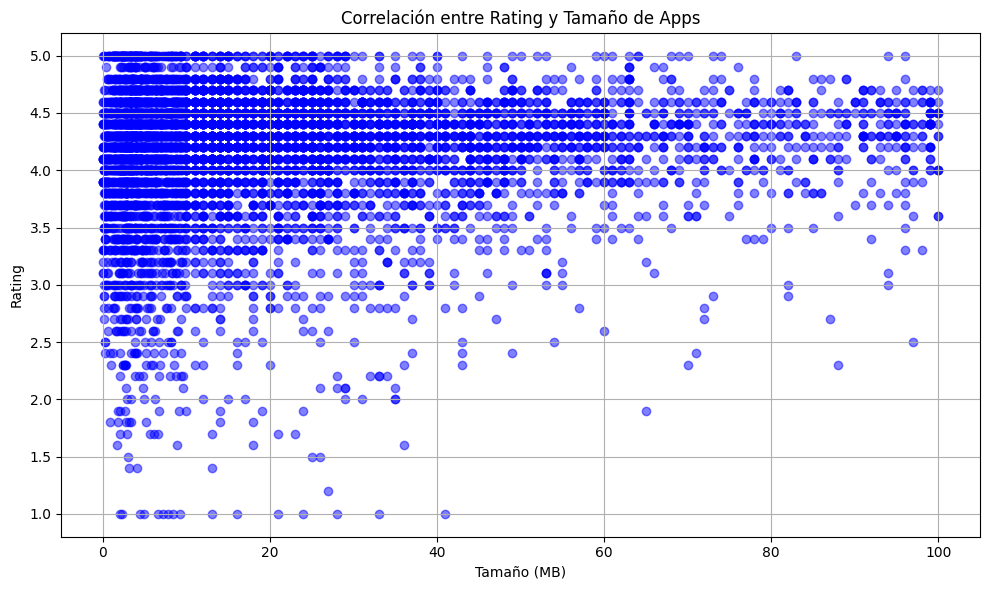

Valor minimo de Mb: 0.01
Valor maximo de Mb: 100.0
Cantidad de Apps con un tamaño menor a 50 Mb: 6155
Cantidad de Apps con un tamaño mayor o igual a 50 Mb: 866
Cantidad de Apps con un tamaño entre 0 a 20 Mb: 4361
Cantidad de Apps con un tamaño entre 21 a 40 Mb: 1430
Cantidad de Apps con un tamaño entre 41 a 60 Mb: 662
Cantidad de Apps con un tamaño entre 61 a 80 Mb: 308
Cantidad de Apps con un tamaño entre 81 a 100 Mb: 260


In [129]:
# Datos de ejemplo
rating = df_gg["Rating"]
size = df_gg["Size_Mb"]  # Asegúrate de que la columna de tamaño esté en megabytes

plt.figure(figsize=(10, 6))

# Graficar el scatter plot
plt.scatter(size, rating, alpha=0.5, color="blue")
plt.title("Correlación entre Rating y Tamaño de Apps")
plt.xlabel("Tamaño (MB)")
plt.ylabel("Rating")
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Valor minimo de Mb: {df_gg["Size_Mb"].min()}")
print(f"Valor maximo de Mb: {df_gg["Size_Mb"].max()}")
print(f"Cantidad de Apps con un tamaño menor a 50 Mb: {df_gg[df_gg["Size_Mb"] < 50.0]["Size_Mb"].value_counts().sum()}")
print(f"Cantidad de Apps con un tamaño mayor o igual a 50 Mb: {df_gg[df_gg["Size_Mb"] >= 50.0]["Size_Mb"].value_counts().sum()}")
print(f"Cantidad de Apps con un tamaño entre 0 a 20 Mb: {df_gg[(df_gg["Size_Mb"] > 0.0) & (df_gg["Size_Mb"] <= 20.0 )]["Size_Mb"].value_counts().sum()}")
print(f"Cantidad de Apps con un tamaño entre 21 a 40 Mb: {df_gg[(df_gg["Size_Mb"] > 20.0) & (df_gg["Size_Mb"] <= 40.0 )]["Size_Mb"].value_counts().sum()}")
print(f"Cantidad de Apps con un tamaño entre 41 a 60 Mb: {df_gg[(df_gg["Size_Mb"] > 40.0) & (df_gg["Size_Mb"] <= 60.0 )]["Size_Mb"].value_counts().sum()}")
print(f"Cantidad de Apps con un tamaño entre 61 a 80 Mb: {df_gg[(df_gg["Size_Mb"] > 60.0) & (df_gg["Size_Mb"] <= 80.0 )]["Size_Mb"].value_counts().sum()}")
print(f"Cantidad de Apps con un tamaño entre 81 a 100 Mb: {df_gg[(df_gg["Size_Mb"] > 80.0) & (df_gg["Size_Mb"] <= 100.0 )]["Size_Mb"].value_counts().sum()}")

Lo anterior es sin considerar los valores nulos que quedaron anteriormente el procesado de los datos.

En la grafica se puede apreciar que:

- La cantidad de Apps disminuyen mientras mas aumentan los Mb, es decir que la mayoria de las Apps tienen poco tamaño en Mb.
- Hay una leve tendencia de que las Apps con mayor Mb tienen mejor calificacion, con algunas excepciones.
- En el caso de las Apps con poco tamaño en Mb, tienen una leve tendencia a  tener una mejor calificacion, pero no lo suficiente como para confirmar con seguridad.

Pero como quedaron valores nulos dentro de la columna se prodecedera a imputar para poder completar los datos en base al promedio de la columna.

In [130]:
#Revisamos la cantidad de nulos
df_gg["Size_Mb"].isna().sum()

np.int64(1169)

In [131]:
#Imputamos los nulos y revisamos
df_gg['Size_Mb'] = df_gg['Size_Mb'].fillna(df_gg['Size_Mb'].mean())
df_gg["Size_Mb"].isna().sum()

np.int64(0)

## Columna "Installs"

In [132]:
df_gg["Installs"].value_counts()

Installs
1,000,000+        1414
100,000+          1094
10,000+            986
10,000,000+        937
1,000+             696
5,000,000+         607
500,000+           503
50,000+            456
5,000+             424
100+               303
50,000,000+        202
500+               199
100,000,000+       188
10+                 69
50+                 56
500,000,000+        24
1,000,000,000+      20
5+                   9
1+                   3
Name: count, dtype: int64

Esta columna si bien tiene datos numericos los valores estan el tipo de dato "object" por lo que se transformaran sus datos a valores numericos para poder analisarlos de la mejor manera.

In [133]:
#Funcion para eliminar los + y , de los valores de la columna installs y convertirlos en numeros flotantes
def rem_caracteres(text):
    text = re.sub(r'\,|\+', '', text) 
    return int(text)

In [134]:
#Nos seguramos que todos los datos ingresados en la funcion sean del tipo str y luego la misma funcion entrega los datos numericos
df_gg['Installs'] = df_gg['Installs'].astype(str)
df_gg['Installs'] = df_gg["Installs"].apply(rem_caracteres)

In [135]:
df_gg["Installs"].value_counts()

Installs
1000000       1414
100000        1094
10000          986
10000000       937
1000           696
5000000        607
500000         503
50000          456
5000           424
100            303
50000000       202
500            199
100000000      188
10              69
50              56
500000000       24
1000000000      20
5                9
1                3
Name: count, dtype: int64

In [136]:
#Se revisan su descripcion
df_gg["Installs"].describe()

count    8.190000e+03
mean     9.171613e+06
std      5.827170e+07
min      1.000000e+00
25%      1.000000e+04
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

Ahora si lo graficamos junto con la variable "Rating":


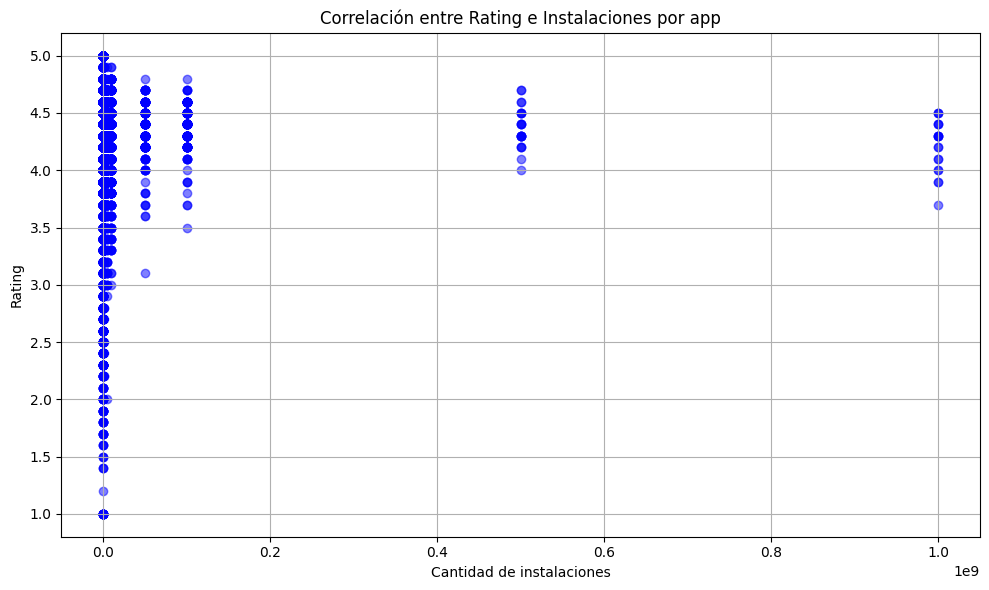

In [137]:
# Datos de ejemplo
rating = df_gg["Rating"]
installs = df_gg["Installs"] 

plt.figure(figsize=(10, 6))

# Graficar el scatter plot
plt.scatter(installs, rating, alpha=0.5, color="blue")
plt.title("Correlación entre Rating e Instalaciones por app")
plt.xlabel("Cantidad de instalaciones")
plt.ylabel("Rating")
plt.grid(True)
plt.tight_layout()
plt.show()

## Columna "Type"

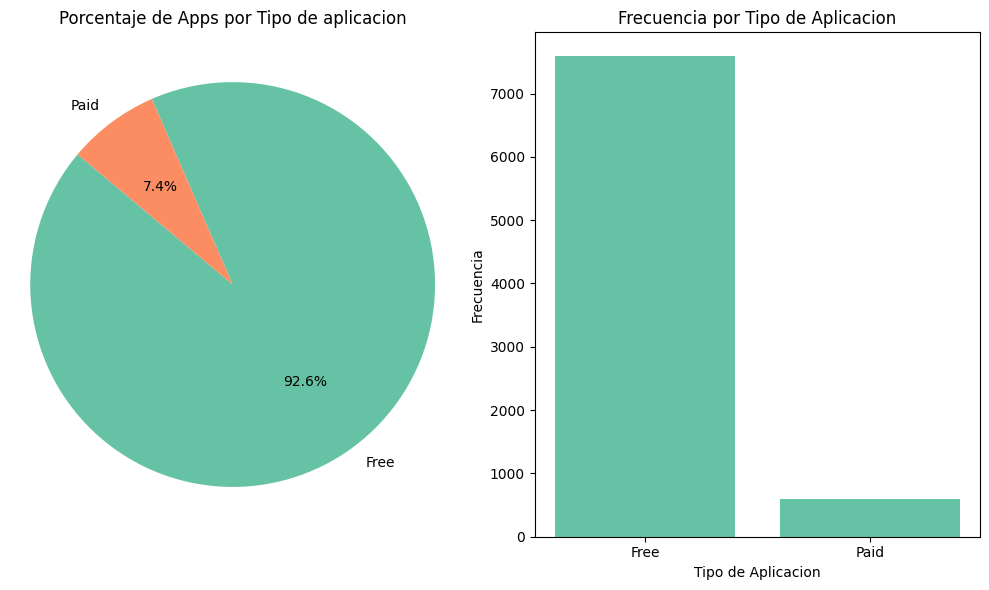

In [138]:
# Se grafica la distribucion de las etiquetas

etiqueta = df_gg["Type"].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

ax1.pie(etiqueta , labels=etiqueta.index, autopct='%1.1f%%', startangle=140)
ax1.set_title('Porcentaje de Apps por Tipo de aplicacion')
ax1.axis('equal')

ax2.bar(etiqueta.index, etiqueta,  width= 0.8, align='center')
ax2.set_title("Frecuencia por Tipo de Aplicacion")
ax2.set_xlabel('Tipo de Aplicacion')
ax2.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()


Se aprecia en las graficas que hay una gran diferencia entre la cantidad de aplicaciones de pago y gratuitas. Ahora se revisaran comparandolas con la columna rating intentando encontrar alguna tendencia.

In [139]:
#Con este codigo se revisa la informacion por categoria
df_gg.groupby('Type')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
Free,7588.0,4.166460,0.534175,1.0,4.0,4.3,4.5,5.0
Paid,602.0,4.259801,0.560762,1.0,4.1,4.4,4.6,5.0


En la tabla anterior se puede apreciar que a pesar de la gran difencia entre la cantidad de apps gratuitas y de pago, tiene valos de promedio, cuartiles y desviacion estandar muy parecidos, por lo que se puede concluir que realmente no hay una gran tendencia a que la apps de pago sean mejor calificadas que las gratuitas.

## Columna "Price"

Para esta columna, hay que trabajar los datos ya que tienen el tipo de dato "Object", siendo una columna con datos numericos, por lo que se procedera a convertir sus datos para poder utilizarlos de la mejor manera.

In [140]:
#Visualizamos los posibles valores
df_gg["Price"].value_counts()

Price
0        7588
$2.99     109
$0.99     103
$4.99      68
$1.99      59
         ... 
$2.95       1
$2.90       1
$1.97       1
$2.56       1
$1.20       1
Name: count, Length: 73, dtype: int64

In [141]:
#Definimos la funcion a utilizar para retirar los caracteres indeseados en la variable, que en este caso es el simbolo del dollar "$"
def rem_dollar(text):
    text = re.sub(r'\$', '', text) 
    return float(text)

In [142]:
#Procesamos los valores en la funcion y comprobamos
df_gg["Price"] = df_gg["Price"].apply(rem_dollar)
df_gg["Price"].value_counts()

Price
0.00    7588
2.99     109
0.99     103
4.99      68
1.99      59
        ... 
2.95       1
2.90       1
1.97       1
2.56       1
1.20       1
Name: count, Length: 73, dtype: int64

In [143]:
#Comprobamos el tipo de dato
df_gg["Price"].dtype

dtype('float64')

In [144]:
#Revisamos algunas de sus descripciones
df_gg["Price"].describe()

count    8190.000000
mean        1.038342
std        16.864040
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

Se puede apreciar que la mayoria de las aplaciones tienen un costo de 0 pesos y que la aplicacion mas cara es de 400 dolares.

In [145]:
#Por ultimo procedemos a renombrar la columna para que quede claro que la moneda es en dolares.
df_gg.rename(columns = {'Price':'Price_usd'}, inplace = True)

In [146]:
#Comprobamos el cambio de nombre 
df_gg.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price_usd,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Mb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8


Se procede a comprarla con la variable "Rating"

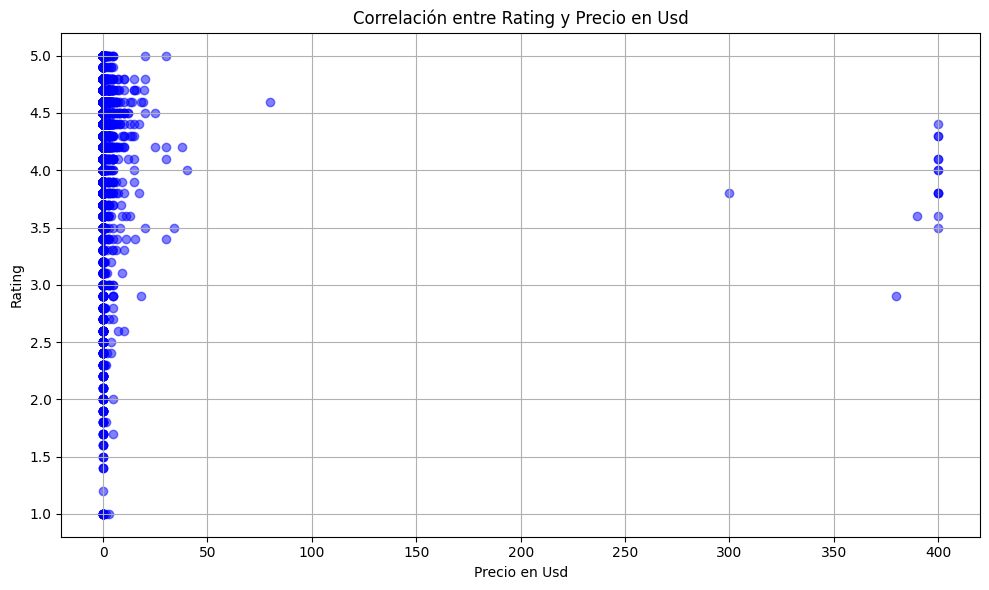

In [147]:
# Datos de ejemplo
rating = df_gg["Rating"]
Price_usd = df_gg["Price_usd"]  # Asegúrate de que la columna de tamaño esté en megabytes

plt.figure(figsize=(10, 6))

# Graficar el scatter plot
plt.scatter(Price_usd, rating, alpha=0.5, color="blue")
plt.title("Correlación entre Rating y Precio en Usd")
plt.xlabel("Precio en Usd")
plt.ylabel("Rating")
plt.grid(True)
plt.tight_layout()
plt.show()


## Columna "Content Rating"

Se revisaran las posibles categorias dentro de la columna.

In [148]:
df_gg["Content Rating"].value_counts()

Content Rating
Everyone           6612
Teen                912
Mature 17+          357
Everyone 10+        305
Adults only 18+       3
Unrated               1
Name: count, dtype: int64

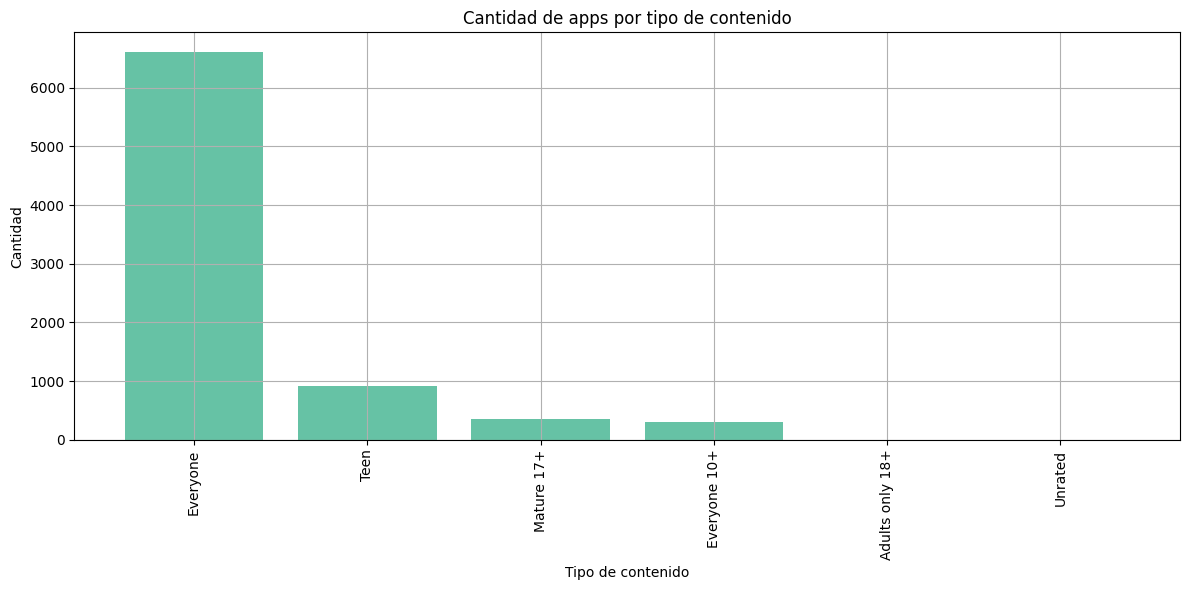

Tipos de contenidos totales:  6


In [149]:
#Grafica de cantidad de apps por categoria

etiqueta = df_gg["Content Rating"].value_counts()

plt.figure(figsize=(12,6))
plt.bar(etiqueta.index, etiqueta)
plt.xticks(rotation=90)
plt.title("Cantidad de apps por tipo de contenido")
plt.xlabel('Tipo de contenido')
plt.ylabel('Cantidad')
plt.grid(True)
plt.tight_layout()
plt.show()
print("Tipos de contenidos totales: ", str(df_gg["Content Rating"].value_counts().shape[0]))


Como se ve en la grafica se puede apreciar que los tipos de contenido que tienen mas aplicaciones son "Everyone", "Teen" y "Madure 17+"

## Columna "Genres"

Esta columna tiene mucha relacion con la columna "categorica" ya que comparte muchas de las etiquetas posibles, siendo "Genres" mucho mas especifica.

In [150]:
# Se revisan los diferentes tipos de generos en las aplicaciones
df_gg["Genres"].value_counts()

Genres
Tools                       716
Entertainment               471
Education                   429
Finance                     302
Productivity                301
                           ... 
Role Playing;Brain Games      1
Strategy;Education            1
Racing;Pretend Play           1
Communication;Creativity      1
Strategy;Creativity           1
Name: count, Length: 114, dtype: int64

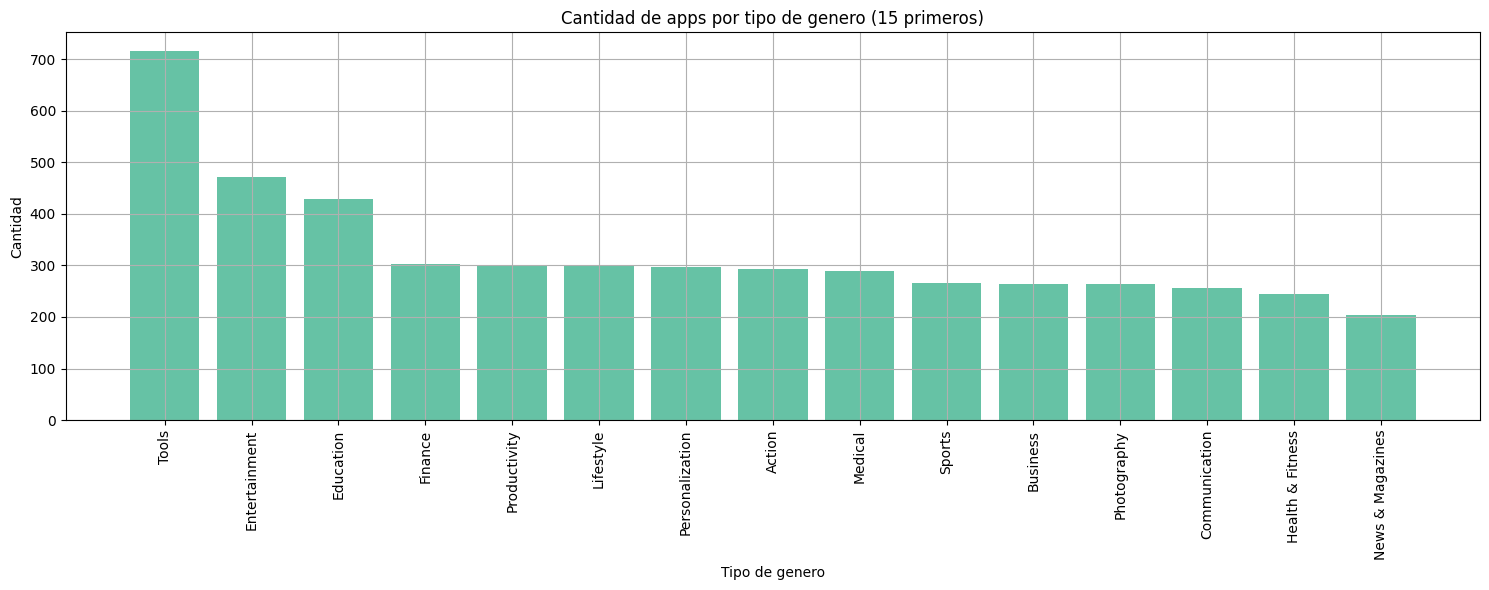

Tipos de generos totales:  114


In [151]:
#Grafica de cantidad de apps por genero

etiqueta = df_gg["Genres"].value_counts().head(15)

plt.figure(figsize=(15,6))
plt.bar(etiqueta.index, etiqueta)
plt.xticks(rotation=90)
plt.title("Cantidad de apps por tipo de genero (15 primeros)")
plt.xlabel('Tipo de genero')
plt.ylabel('Cantidad')
plt.grid(True)
plt.tight_layout()
plt.show()
print("Tipos de generos totales: ", str(df_gg["Genres"].value_counts().shape[0]))


En este caso la grafica muestra solo los 15 generos con mayor cantidad de apps, ya que en total son 114 generos, lo que no seria muy interpretativo en una grafica.

Pero considerando que nos interesan los que tienen mayor cantidad de apps, estos son: "Tools", "Entertainment" y "Education".

## Columna "Last Update"

Esta columna tiene el tipo de dato de tiempo por lo que se procede a transformar su tipo de dato a datetime, y luego dividirlo en mes y año para agregarlo posteriormente al modelo.

Revisamos los valores de la variable:

In [152]:
df_gg["Last Updated"].sample(10)

3833     June 30, 2018
7615     July 27, 2013
6517     July 17, 2018
5079      May 27, 2016
1210     June 30, 2016
1871     July 31, 2018
178     August 3, 2018
400     August 3, 2018
3889      July 8, 2016
7188    August 5, 2015
Name: Last Updated, dtype: object

In [153]:
#Se convierte la columna a tipo de tiempo.
df_gg["Last Updated"] = pd.to_datetime(df_gg["Last Updated"])
df_gg["Last Updated"].sample(10)

6528   2018-07-24
1329   2018-07-23
5335   2018-06-13
7374   2018-01-26
3983   2017-11-04
5408   2015-08-13
6112   2018-07-28
2224   2018-08-01
6397   2018-07-31
6151   2017-09-21
Name: Last Updated, dtype: datetime64[ns]

## Columnas "Current Ver" y "Android Ver"

Estas columnas entregan informacion sobre versiones tanto de la aplicacion como de android pero no muestran demasiada informacion respecto a lo que nos interesa, que es la app en general, puede que tengan un porcentaje infimo de influencia dentro del Rating pero considerando lo ultimo, lo más logico es no considerarlos.

In [154]:
# Se elimina las dos columnas anteriormente mencionadas

df_gg.drop(columns=["Current Ver","Android Ver"], inplace=True)
df_gg.reset_index(drop=True, inplace=True)
df_gg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             8190 non-null   object        
 1   Category        8190 non-null   object        
 2   Rating          8190 non-null   float64       
 3   Reviews         8190 non-null   int64         
 4   Size            7021 non-null   float64       
 5   Installs        8190 non-null   int64         
 6   Type            8190 non-null   object        
 7   Price_usd       8190 non-null   float64       
 8   Content Rating  8190 non-null   object        
 9   Genres          8190 non-null   object        
 10  Last Updated    8190 non-null   datetime64[ns]
 11  Size_Mb         8190 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(5)
memory usage: 767.9+ KB


# Visualizacion y Respuestas

Ahora se responderan las preguntas que se generaron en la descripcion:

## ¿Cuál categoría tiene el mayor número de aplicaciones?


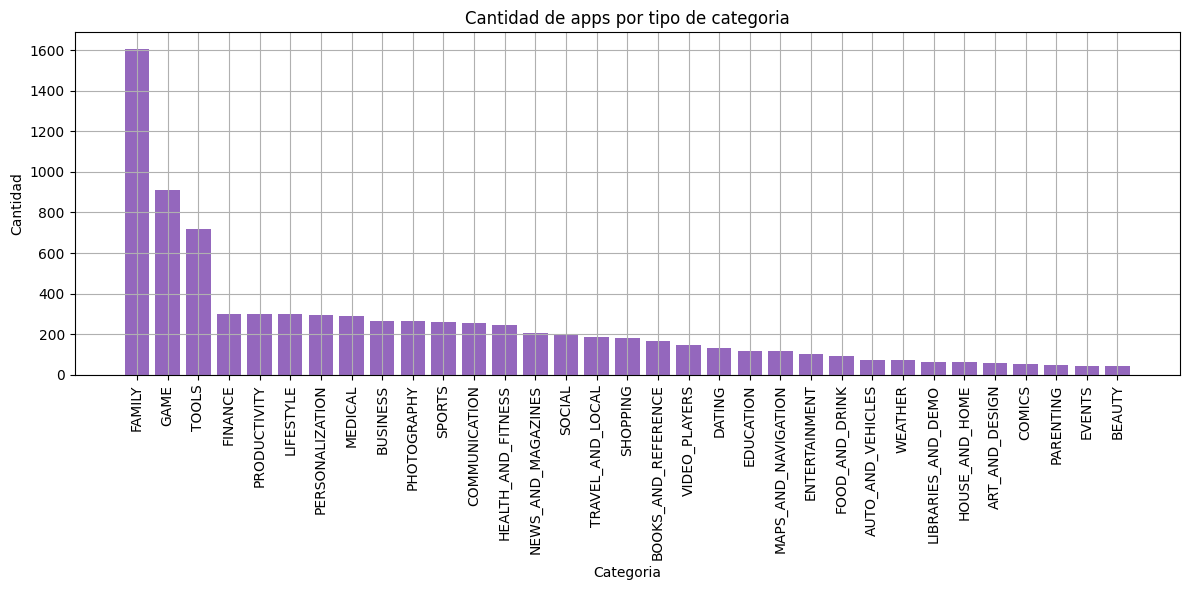

Categorias totales:  33
La categoria con mas cantidad de aplicaciones es FAMILY con un total de: 1607



In [155]:
#Grafica de categorias con mayor numero de aplicaciones
#Grafica de cantidad de apps por categoria

etiqueta = df_gg["Category"].value_counts()

plt.figure(figsize=(12,6))
plt.bar(etiqueta.index, etiqueta, color="tab:purple")
plt.xticks(rotation=90)
plt.title("Cantidad de apps por tipo de categoria")
plt.xlabel('Categoria')
plt.ylabel('Cantidad')
plt.grid(True)
plt.tight_layout()
plt.show()
print("Categorias totales: ", str(df_gg["Category"].value_counts().shape[0]))
print(f"La categoria con mas cantidad de aplicaciones es {etiqueta.index[0]} con un total de: {etiqueta[0]}\n")


## ¿Cuáles son las 5 aplicaciones mejor calificadas?


In [156]:
#Obtenemos las aplicacions con 5 estrellas que tienen mayor cantidad de reviews.

Most_5_apps = df_gg[df_gg['Rating'] == 5.0].sort_values(by='Reviews', ascending=False).head(5)
Most_5_apps = Most_5_apps["App"]
k = 0

print("Las 5 Apps con mejores calificaciones y mayor cantidad de reviews son:")
for App in Most_5_apps:
    k = k+1
    print(f"\n {k}.- {App}")

Las 5 Apps con mejores calificaciones y mayor cantidad de reviews son:

 1.- Ríos de Fe

 2.- FD Calculator (EMI, SIP, RD & Loan Eligilibility)

 3.- Oración CX

 4.- Barisal University App-BU Face

 5.- Master E.K


## ¿Cuáles son las 5 aplicaciones peor calificadas?


In [157]:
#Obtenemos las aplicacions con 1 estrellas que tienen mayor cantidad de reviews.

Bad_5_apps = df_gg[df_gg['Rating'] == 1.0].sort_values(by='Reviews', ascending=False).head(5)
Bad_5_apps = Bad_5_apps["App"]
k = 0

print("Las 5 Apps con peores calificaciones y mayor cantidad de reviews son:")

for App in Bad_5_apps:
    k = k+1
    print(f"\n {k}.- {App}")

Las 5 Apps con peores calificaciones y mayor cantidad de reviews son:

 1.- CJ DVD Rentals

 2.- CB Mobile Biz

 3.- Lottery Ticket Checker - Florida Results & Lotto

 4.- DS Creator 2.0

 5.- Tech CU Card Manager


## ¿Cuál categoría tiene la mayor cantidad de aplicaciones mejor calificadas?


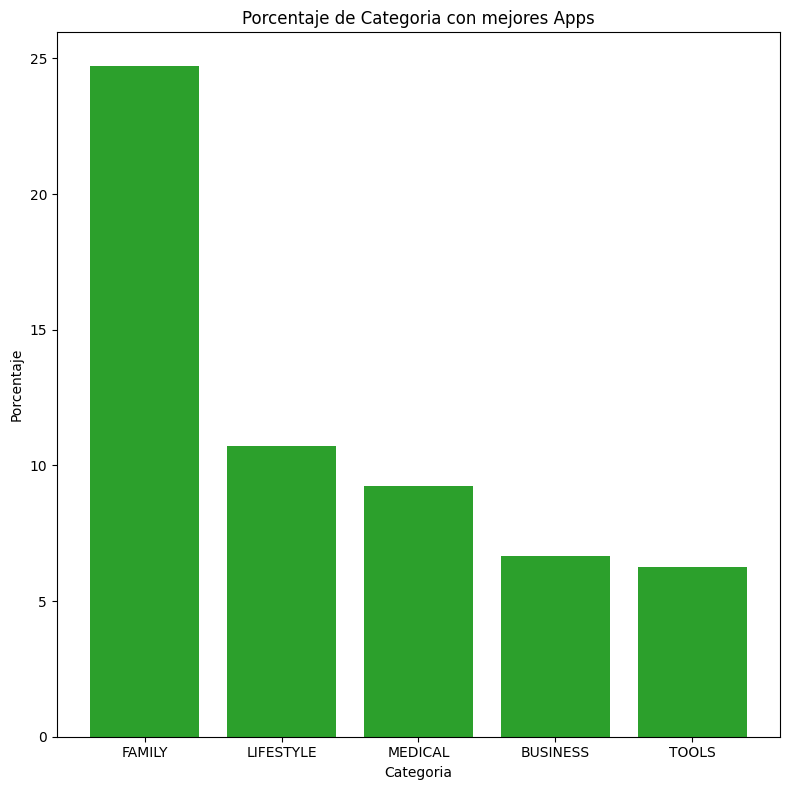

La categoria con mayor cantidad de aplicaciones con 5.0 de Rating es FAMILY con un total de: 67



In [158]:
#Filtramos las apps que tengan 5.0 de rating y contamos su valores por categoria.

etiqueta = df_gg[df_gg['Rating'] == 5.0]["Category"].value_counts(normalize=True).head(5)
mayor = df_gg[df_gg['Rating'] == 5.0]["Category"].value_counts().head(1)
plt.figure(figsize=(8, 8))
plt.bar(etiqueta.index ,etiqueta*100, color= "tab:green")
plt.title('Porcentaje de Categoria con mejores Apps')
plt.xlabel('Categoria')
plt.ylabel('Porcentaje')
plt.tight_layout()
plt.show()

print(f"La categoria con mayor cantidad de aplicaciones con 5.0 de Rating es {etiqueta.index[0]} con un total de: {mayor[0]}\n")

## ¿Cuál categoría tiene la aplicación con el mayor número de reseñas?

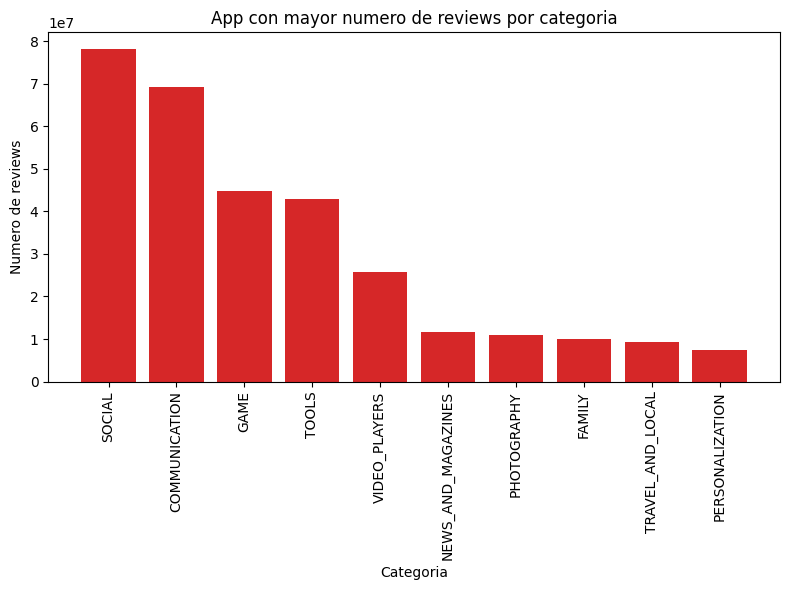

La categoria que tiene la aplicacion con mas reviews es SOCIAL con un total de: 78158306 reviews, llamada: Facebook



In [159]:
#ordenamos las apps de mayor a menor segun reseñas considerando su cateria

etiqueta = df_gg.groupby('Category')['Reviews'].max().sort_values(ascending=False).head(10)
max_app = df_gg[df_gg["Category"] == "SOCIAL"].sort_values(by ="Reviews", ascending=False )["App"].head(2).values
plt.figure(figsize=(8, 6))
plt.bar(etiqueta.index ,etiqueta, color= "tab:red")
plt.title('App con mayor numero de reviews por categoria')
plt.xticks(rotation=90)
plt.xlabel('Categoria')
plt.ylabel('Numero de reviews')
plt.tight_layout()
plt.show()

print(f"La categoria que tiene la aplicacion con mas reviews es {etiqueta.index[0]} con un total de: {etiqueta[0]} reviews, llamada: {max_app[0]}\n")

## ¿Cuál es el tamaño promedio de las aplicaciones con el mayor número de instalaciones, calificaciones y reseñas?


In [160]:
#Primero se obtienen las Aplicaciones con mayor numero de instalaciones, calificacicones y reseñas

App_inst_max = df_gg["Installs"].max()
Apps_inst = df_gg[df_gg["Installs"] == App_inst_max]

print(f"El tamaño promedio de las aplicaciones con el mayor numero de Instalaciones es de: {round(Apps_inst["Size_Mb"].mean(),2)} Mb")

App_rating_max = df_gg["Rating"].max()
Apps_rating = df_gg[df_gg["Rating"] == App_rating_max]

print(f"El tamaño promedio de las aplicaciones con el mayor numero de Rating es de: {round(Apps_rating["Size_Mb"].mean(),2)} Mb")

App_reviews_max = df_gg["Reviews"].max()
Apps_reviews = df_gg[df_gg["Reviews"] == App_reviews_max]

print(f"El tamaño promedio de las aplicaciones con el mayor numero de Reviews es de: {round(Apps_reviews["Size_Mb"].mean(),2)} Mb")

El tamaño promedio de las aplicaciones con el mayor numero de Instalaciones es de: 24.04 Mb
El tamaño promedio de las aplicaciones con el mayor numero de Rating es de: 14.24 Mb
El tamaño promedio de las aplicaciones con el mayor numero de Reviews es de: 21.77 Mb


## ¿Cuál es la aplicación de pago más cara y cuántas reseñas, instalaciones y calificaciones tiene?


In [161]:
#Se busca el precio maximo y luego se va obtiendo la informacion por separado
max_price = df_gg["Price_usd"].max()
nombre = df_gg[df_gg["Price_usd"] == max_price]["App"].values[0]
rev = df_gg[df_gg["Price_usd"] == max_price]["Reviews"].values[0]
inst = df_gg[df_gg["Price_usd"] == max_price]["Installs"].values[0]
rat = df_gg[df_gg["Price_usd"] == max_price]["Rating"].values[0]
print(f'La Aplicacion de pago mas cara es "{nombre}" que tiene {rev} reseñas, {inst} instalaciones y {rat} puntos de calificación.')

La Aplicacion de pago mas cara es "I'm Rich - Trump Edition" que tiene 275 reseñas, 10000 instalaciones y 3.6 puntos de calificación.


## ¿Cuáles son las aplicaciones con el mayor número de instalaciones?


In [162]:
max_installs = df_gg["Installs"].max()
etiqueta = df_gg[df_gg['Installs'] == max_installs]["App"]
k=0

print(f"Algunas de las Aplicaciones con mayor numero de instalaciones ({max_installs}) son: ")

for App in etiqueta.head(10):
    k = k+1
    print(f"\n {k}.- {App}")

Algunas de las Aplicaciones con mayor numero de instalaciones (1000000000) son: 

 1.- Google Play Books

 2.- Messenger – Text and Video Chat for Free

 3.- WhatsApp Messenger

 4.- Google Chrome: Fast & Secure

 5.- Gmail

 6.- Hangouts

 7.- Skype - free IM & video calls

 8.- Google Play Games

 9.- Subway Surfers

 10.- Facebook


## ¿Qué calificación de contenido tiene el mayor número de instalaciones, reseñas y las mejores calificaciones?


In [163]:
cr_mi = df_gg.groupby("Content Rating")["Installs"].sum() #Se agrupo por tipo de contenido mostrando los valores de la columna installs, sumando estas mismas y guardando los datos en una variable
cr_mr = df_gg.groupby("Content Rating")["Reviews"].sum() #Se agrupo por tipo de contenido mostrando los valores de la columna reviews, sumando estas mismas y guardando los datos en una variable
cr_mra = df_gg[df_gg["Rating"] == 5.0 ].groupby("Content Rating")["Rating"].value_counts() #Se agrupo por tipo de contenido mostrando los valores de la columna rating pero solo las apps con 5 puntos de rating y contando la cantidad de filas y guardando el dato en una varible
cr_mram = df_gg.groupby("Content Rating")["Rating"].mean() #Se agrupo por tipo de contenido mostrando los valores de la columna rating, calculando el promedio y guardando los datos en una variable

print(f"\nEl tipo de contenido que tiene el mayor numero de instalaciones es {cr_mi[cr_mi == cr_mi.max()].index[0]}, con un total de : {cr_mi.max()} instalaciones")
print(f"\nEl tipo de contenido que tiene el mayor numero de reviews es {cr_mr[cr_mr == cr_mr.max()].index[0]}, con un total de : {cr_mr.max()} reviews")
print(f"\nEl tipo de contenido que tiene el mayor numero de Aplicaciones con 5.0 de rating es {cr_mra[cr_mra == cr_mra.max()].index[0][0]}, con un total de : {cr_mra.max()} Apps")
print(f"\nEl tipo de contenido que tiene el mayor numero promedio de rating es {cr_mram[cr_mram == cr_mram.max()].index[0]}, con un total de : {cr_mram.max()} puntos")


El tipo de contenido que tiene el mayor numero de instalaciones es Everyone, con un total de : 52172409888 instalaciones

El tipo de contenido que tiene el mayor numero de reviews es Everyone, con un total de : 1300277909 reviews

El tipo de contenido que tiene el mayor numero de Aplicaciones con 5.0 de rating es Everyone, con un total de : 237 Apps

El tipo de contenido que tiene el mayor numero promedio de rating es Adults only 18+, con un total de : 4.3 puntos


## ¿Cuáles aplicaciones tienen el mayor número de instalaciones en la categoría "Game"?

In [164]:
game_app = df_gg[df_gg["Category"]== "GAME"].sort_values(by="Installs", ascending=False).head(10)
k=0
print(f"\nLas aplicaciones con mayor numero de instalaciones en la categoria 'Game' son: ")

for App, ins in zip(game_app["App"], game_app["Installs"]):
    k = k+1
    print(f"\n {k}.- '{App}' con un total de: {ins} Instalaciones")


Las aplicaciones con mayor numero de instalaciones en la categoria 'Game' son: 

 1.- 'Subway Surfers' con un total de: 1000000000 Instalaciones

 2.- 'Temple Run 2' con un total de: 500000000 Instalaciones

 3.- 'Candy Crush Saga' con un total de: 500000000 Instalaciones

 4.- 'My Talking Tom' con un total de: 500000000 Instalaciones

 5.- 'Pou' con un total de: 500000000 Instalaciones

 6.- 'PAC-MAN' con un total de: 100000000 Instalaciones

 7.- 'Cut the Rope FULL FREE' con un total de: 100000000 Instalaciones

 8.- 'Sniper 3D Gun Shooter: Free Shooting Games - FPS' con un total de: 100000000 Instalaciones

 9.- 'Cooking Fever' con un total de: 100000000 Instalaciones

 10.- 'Clash Royale' con un total de: 100000000 Instalaciones


## ¿Cuál es la calificación promedio por categoría de aplicaciones?

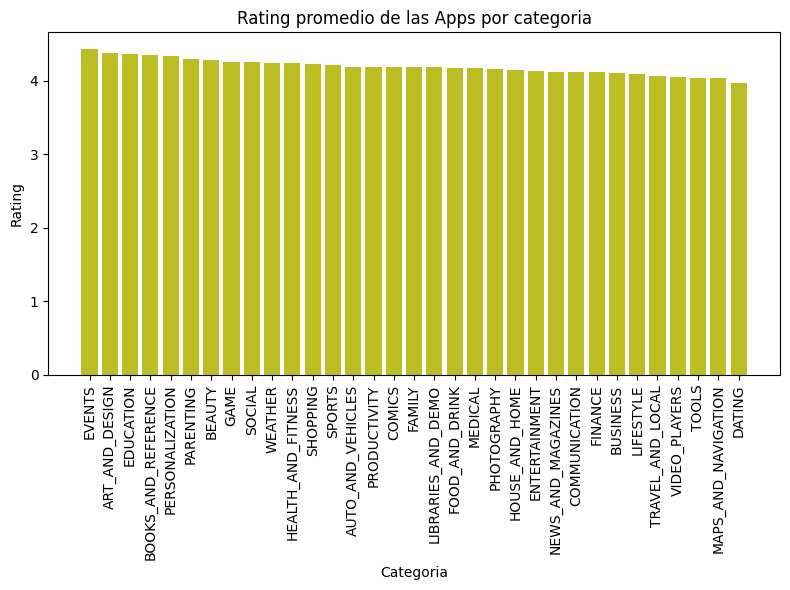

La categoria que tiene mejor promedio en rating es EVENTS con un valor de: 4.44 puntos



In [165]:
#Se agrupo por tipo de contenido mostrando los valores de la columna rating, calculando el promedio y guardando los datos en una variable
etiqueta = df_gg.groupby("Category")["Rating"].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
plt.bar(etiqueta.index ,etiqueta, color= "tab:olive")
plt.title('Rating promedio de las Apps por categoria')
plt.xticks(rotation=90)
plt.xlabel('Categoria')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

print(f"La categoria que tiene mejor promedio en rating es {etiqueta.index[0]} con un valor de: {round(etiqueta[0],2)} puntos\n")

## ¿Qué categoría de aplicaciones tiene el tamaño promedio más grande?


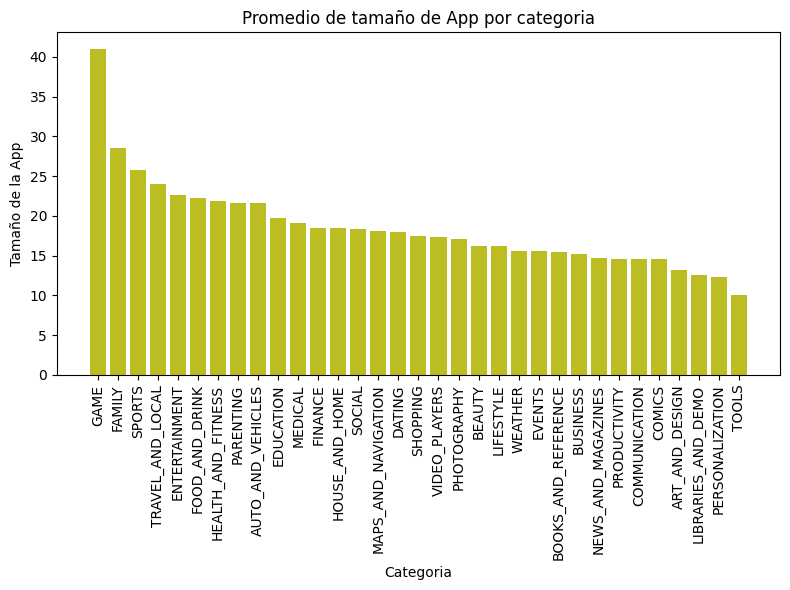

La categoria que tiene el promedio mas grande en tamaño es 'GAME' con un valor de: 41.03 Mb



In [166]:
etiqueta = df_gg.groupby("Category")["Size_Mb"].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
plt.bar(etiqueta.index ,etiqueta, color= "tab:olive")
plt.title('Promedio de tamaño de App por categoria')
plt.xticks(rotation=90)
plt.xlabel('Categoria')
plt.ylabel('Tamaño de la App')
plt.tight_layout()
plt.show()

print(f"La categoria que tiene el promedio mas grande en tamaño es '{etiqueta.index[0]}' con un valor de: {round(etiqueta[0],2)} Mb\n")

## ¿Qué categorías tienen el mayor porcentaje de aplicaciones de pago?

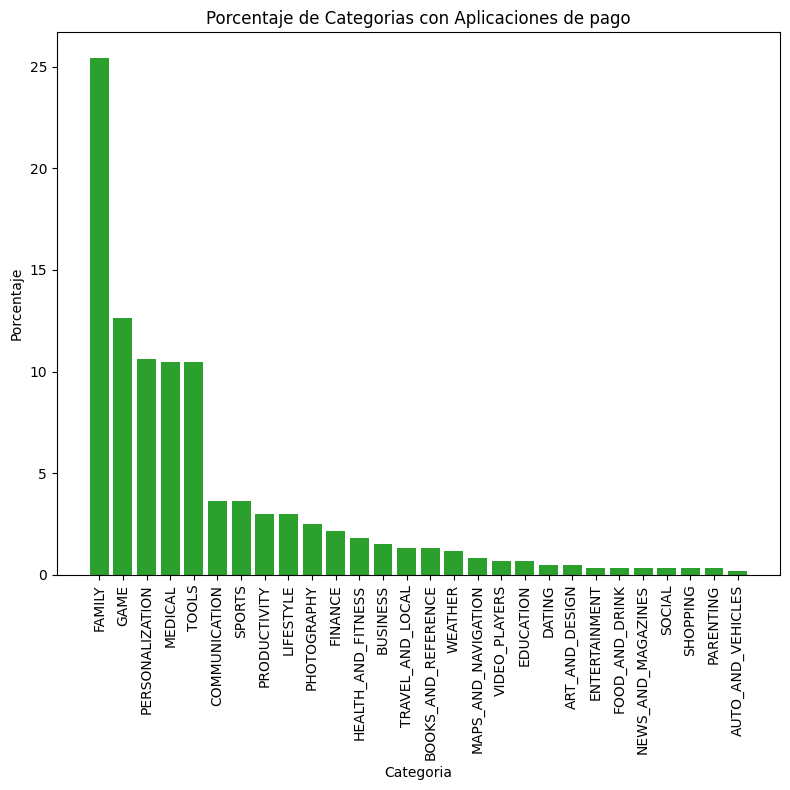

La categoria con mayor cantidad de aplicaciones de pago es FAMILY con un total de: 153 aplicaciones



In [167]:
etiqueta = df_gg[df_gg["Type"]== "Paid"]["Category"].value_counts(normalize=True)
mayor = df_gg[df_gg["Type"]== "Paid"]["Category"].value_counts().max()
plt.figure(figsize=(8, 8))
plt.bar(etiqueta.index ,etiqueta*100, color= "tab:green")
plt.title('Porcentaje de Categorias con Aplicaciones de pago')
plt.xticks(rotation=90)
plt.xlabel('Categoria')
plt.ylabel('Porcentaje')
plt.tight_layout()
plt.show()

print(f"La categoria con mayor cantidad de aplicaciones de pago es {etiqueta.index[0]} con un total de: {mayor} aplicaciones\n")

# Preparacion de datos para el modelo de clasificacion.

Para ingresar los datos al modelo faltan hacer algunas transformaciones como lo son, los encoding y scaladores, de esta manera el modelo podra procesar mejor los datos entregados.
Para ello se creara un dataframe que contenga la informacion de las columnas importantes o con mayor informacion.

## Columna target Rating

Empezaremos transformando la variable target (Rating), en una variable categorica y guardando la informacion en el nuevo dataframe.

In [168]:
#Se crea el nuevo df
df = pd.DataFrame()

In [169]:
#Se le agrega su variable target
df["Rating"] = df_gg["Rating"].astype(int)

In [170]:
#Se presenta el inicio del nuevo df
df

,Rating
0,4
1,3
2,4
3,4
4,4
...,...
8185,4
8186,4
8187,5
8188,4


Por que se transforma en numeros enteros?, por que de esta manera tenemos valores limitados entre 1 y 5, y no valores infinitos entre 1 y 5, como se puede apreciar en la siguiente grafica:


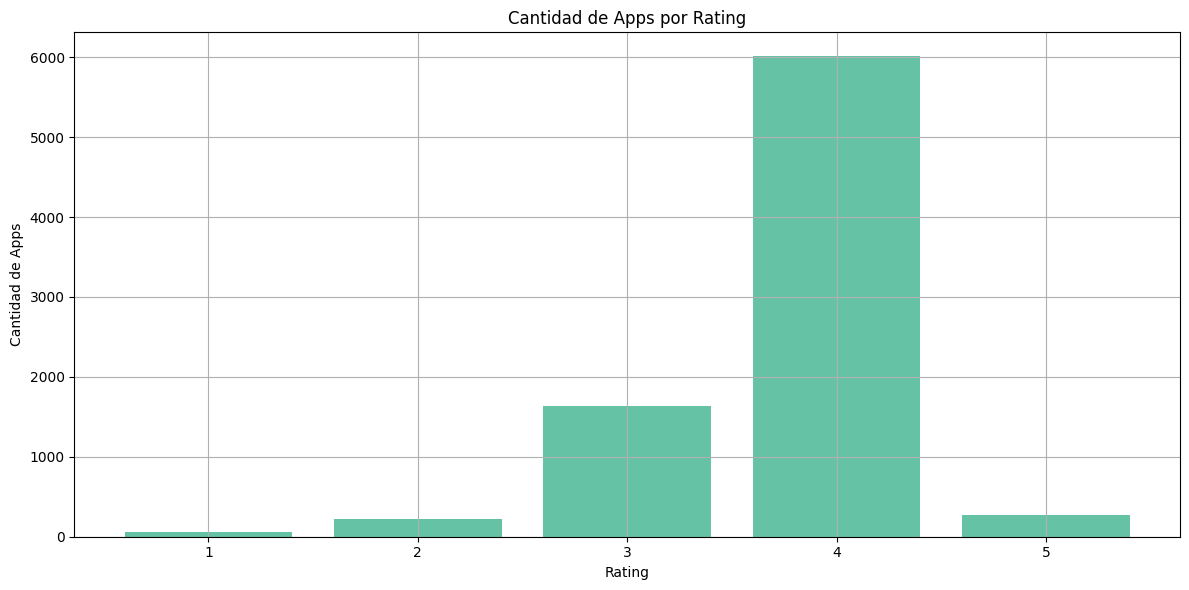

Rango Min del rating: 1 
Rango Max del rating: 5


In [171]:
#Grafica de cantidad de apps por Rating

etiqueta = df['Rating'].value_counts().sort_index()

plt.figure(figsize=(12,6))
plt.bar(etiqueta.index, etiqueta, align='center')
plt.title('Cantidad de Apps por Rating')
plt.xlabel('Rating')
plt.ylabel('Cantidad de Apps')
plt.grid(True)
plt.tight_layout()
plt.show()
print(f"Rango Min del rating: {df['Rating'].min()} \nRango Max del rating: {df['Rating'].max()}")


Antes de empezar transformar los datos se procede a guardar los demas datos de las variables autilizar en el df de procesamiento

In [172]:
#Variables que no seran consideradas para el modelo
variables_no_consideradas = ["App","Size","Last Updated","Rating","Genres"]

#Se resetea el index par que este totalmente ordenado
df_gg.reset_index(drop=True, inplace=True)

#Se genera una copia del df principal sin considerar las columnas anteriores
df = df_gg.copy().drop(variables_no_consideradas, axis = 1 )

#En el caso de la varible Last Updated, solo se tomaran el año y el mes su ultima actualizacion.
df["Updated Mes"] = df_gg["Last Updated"].dt.month.astype("category")
df["Updated Año"] = df_gg["Last Updated"].dt.year.astype("category")

In [173]:
df

,Category,Reviews,Installs,Type,Price_usd,Content Rating,Size_Mb,Updated Mes,Updated Año
0,ART_AND_DESIGN,159,10000,Free,0.0,Everyone,19.000000,1,2018
1,ART_AND_DESIGN,967,500000,Free,0.0,Everyone,14.000000,1,2018
2,ART_AND_DESIGN,87510,5000000,Free,0.0,Everyone,8.700000,8,2018
3,ART_AND_DESIGN,215644,50000000,Free,0.0,Teen,25.000000,6,2018
4,ART_AND_DESIGN,967,100000,Free,0.0,Everyone,2.800000,6,2018
...,...,...,...,...,...,...,...,...,...
8185,FAMILY,7,500,Free,0.0,Everyone,2.600000,6,2017
8186,FAMILY,38,5000,Free,0.0,Everyone,53.000000,7,2017
8187,FAMILY,4,100,Free,0.0,Everyone,3.600000,7,2018
8188,BOOKS_AND_REFERENCE,114,1000,Free,0.0,Mature 17+,21.767174,1,2015


In [174]:
#Se le agrega su variable target
df["Rating"] = df_gg["Rating"].astype(int)

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Category        8190 non-null   object  
 1   Reviews         8190 non-null   int64   
 2   Installs        8190 non-null   int64   
 3   Type            8190 non-null   object  
 4   Price_usd       8190 non-null   float64 
 5   Content Rating  8190 non-null   object  
 6   Size_Mb         8190 non-null   float64 
 7   Updated Mes     8190 non-null   category
 8   Updated Año     8190 non-null   category
 9   Rating          8190 non-null   int64   
dtypes: category(2), float64(2), int64(3), object(3)
memory usage: 528.5+ KB


Ahora se transformaran las variables categoricas en variables de encoding, es decir se le asignara un valor numerico a su etiqueta para que sea reconocida y procesadas por el modelo.

Pero antes de ello, se dividiran los set de entrenamiento y de testeo en sus respectivos grupos de variables dependientes e independientes

In [176]:
X = df.copy().drop(["Rating"],axis=1)
y = df.copy()["Rating"]

Se generan los encoding de las variables categoricas:

In [177]:
#Se divide en un test del 30% de los datos.
X_train, X_test, y_train, y_test = train_test_split( X , y , test_size = 0.3, random_state = 42 )

In [178]:
#se definen las variables a realizar el encoding
variables_de_encoding = X_train.select_dtypes(include=["category", "object"]).columns

encoder_dict = defaultdict()

for col in variables_de_encoding:
    encoder = LabelEncoder()

    X_train[col] = encoder.fit_transform(X_train[col]) # Fitting and tranforming the Train data
    X_train[col] = X_train[col].astype('category') # Converting the label encoded features from numerical back to categorical dtype in pandas

    X_test[col] = encoder.transform(X_test[col]) # Only transforming the test data
    X_test[col] = X_test[col].astype('category') # Converting the label encoded features from numerical back to categorical dtype in pandas

    encoder_dict[col] = encoder # Saving the label encoder for individual features

Ahora se escalan las variables numericas para que tengan valores estandares para el modelo.

In [179]:
#Se preceden a escalar los datos
scaler = MinMaxScaler()

#Se entrenan y transforman las variables de entrenamiento
X_train = scaler.fit_transform(X_train)

#solo se transforman las variables de testeo
X_test = scaler.transform(X_test)


Quedando de esta forma los datos de entrenamiento:

In [180]:
X_train

array([[9.37500000e-01, 2.58639716e-04, 9.99999001e-04, ...,
        2.79927993e-01, 5.45454545e-01, 1.00000000e+00],
       [7.81250000e-01, 1.15278920e-04, 9.99990001e-05, ...,
        1.99919992e-01, 9.09090909e-02, 1.00000000e+00],
       [4.37500000e-01, 6.04143719e-04, 9.99999001e-04, ...,
        1.19911991e-01, 0.00000000e+00, 5.00000000e-01],
       ...,
       [3.75000000e-01, 1.13369179e-03, 9.99999001e-04, ...,
        2.19921992e-01, 5.45454545e-01, 1.00000000e+00],
       [6.56250000e-01, 1.57987677e-05, 9.99990001e-05, ...,
        2.17593501e-01, 5.45454545e-01, 1.00000000e+00],
       [4.37500000e-01, 2.76767789e-05, 9.99990001e-05, ...,
        2.39923992e-01, 4.54545455e-01, 1.00000000e+00]])

In [181]:
y_train

2284    4
6554    4
3859    4
4620    4
4690    4
       ..
5226    4
5390    4
860     4
7603    3
7270    4
Name: Rating, Length: 5733, dtype: int64

Y de esta manera los datos de testeo:


In [182]:
X_test

array([[7.50000000e-01, 1.87025870e-03, 9.99999901e-03, ...,
        1.09910991e-01, 5.45454545e-01, 1.00000000e+00],
       [3.43750000e-01, 7.52322271e-07, 9.99900001e-06, ...,
        8.19981998e-01, 1.81818182e-01, 1.00000000e+00],
       [9.06250000e-01, 7.71130327e-06, 9.99990001e-05, ...,
        2.99029903e-02, 4.54545455e-01, 1.00000000e+00],
       ...,
       [1.25000000e-01, 8.66183353e-05, 4.99999000e-04, ...,
        2.17593501e-01, 3.63636364e-01, 7.50000000e-01],
       [4.37500000e-01, 5.97333900e-02, 4.99999991e-02, ...,
        2.17593501e-01, 5.45454545e-01, 1.00000000e+00],
       [3.43750000e-01, 3.18145514e-05, 9.99999001e-04, ...,
        7.29972997e-01, 5.45454545e-01, 1.00000000e+00]])

In [183]:
y_test

2126    3
4270    2
4894    4
6691    3
1320    4
       ..
135     4
7700    4
4622    4
1310    4
7363    4
Name: Rating, Length: 2457, dtype: int64

# Entrenamiento del los modelos.

En esta seccion se haran pruebas con diferentes modelos para ver exactud a la hora de predecir los datos, para eso asignaremos un dataframe que recopile los datos de una manera más visual y agradable.

In [184]:
#Primero definimos los modelos que se utilizaran, los tipos de datos para los modelos y el valor de la metrica a comparar. en este caso exactitud

modelos = ['Logistic Regression', 'KNeighbors', 'Random Forest']
datasets = ['train', 'test']

index_ = pd.MultiIndex.from_product( [ modelos, datasets ] , names=[ 'Modelo' , 'Dataset'] )

df_exactitud = pd.DataFrame( index=index_ , columns=['Exactitud'] )

Viendose de esta manera:

In [185]:
df_exactitud

Exactitud
Modelo              Dataset          
Logistic Regression train         NaN
                    test          NaN
KNeighbors          train         NaN
                    test          NaN
Random Forest       train         NaN
                    test          NaN

El primero de ellos es Logistic Regression:


In [186]:
#Se importa el tipo de modelo
Lr_clasificador = LogisticRegression()
#Se entrena el modelo con los datos de entramiento ya procesados
Lr_clasificador.fit(X_train, y_train)

#Se obtinen sus metricas de exactitud en cada tipo de dataset creado
#Train
df_exactitud.loc['Logistic Regression', 'train'] = Lr_clasificador.score(X_train, y_train)
#Test
df_exactitud.loc['Logistic Regression', 'test'] = Lr_clasificador.score(X_test, y_test)

El segundo de ellos es KNeighbors:

In [187]:
#Se importa el tipo de modelo
Knc = KNeighborsClassifier()
#Se entrena el modelo con los datos de entramiento ya procesados
Knc.fit(X_train, y_train)
#Se obtinen sus metricas de exactitud en cada tipo de dataset creado
#Train
df_exactitud.loc['KNeighbors', 'train'] = Knc.score(X_train, y_train)
#Test
df_exactitud.loc['KNeighbors', 'test'] = Knc.score(X_test, y_test)

Y el ultimo de ellos es Random Forest:

In [188]:
#Se importa el tipo de modelo
Rfc = RandomForestClassifier()
#Se entrena el modelo con los datos de entramiento ya procesados
Rfc.fit(X_train, y_train)
#Se obtinen sus metricas de exactitud en cada tipo de dataset creado
#Train
df_exactitud.loc['Random Forest', 'train'] = Rfc.score(X_train, y_train)
#Test
df_exactitud.loc['Random Forest', 'test'] = Rfc.score(X_test, y_test)

Como los datos de exactitud los dan en decimales que hay que convertir sus valores para que sean mas entendibles.

In [189]:
def Porcentaje(Exactitud):
    Exactitud = round(Exactitud*100, 2)
    return Exactitud

df_exactitud = df_exactitud.apply(Porcentaje)

Ahora se puede entender de mejor manera cual modelo fue mas preciso, sin hiperparametros.

Graficado queda de la siguiente manera:

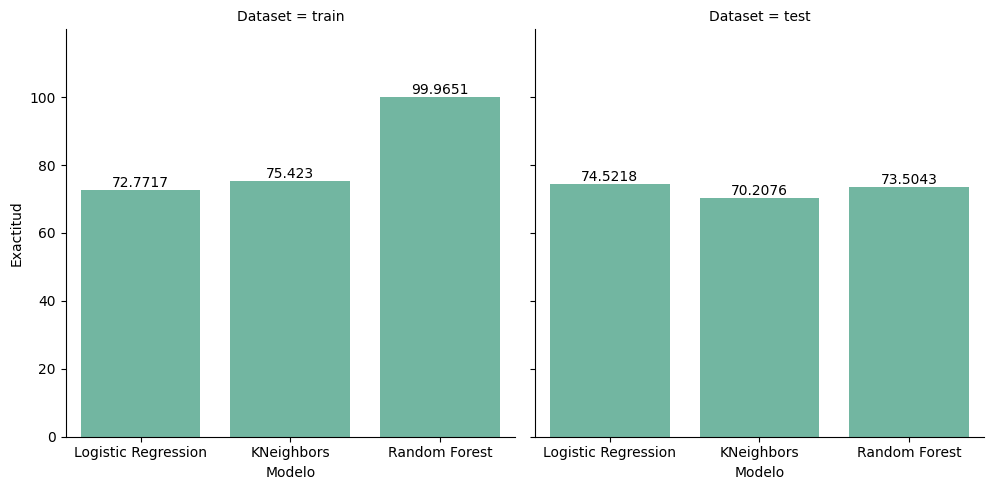

In [190]:
#Se reordena los valores de index del dataset de exactitud
Dt= df_exactitud.reset_index()

#Se asignan mejores colores

sns.set_palette(palette = "Set2", n_colors=None, desat=None, color_codes=False)

#Se asigna el plot a una variable para poder generar mas de una grafica a la vez
Plot = sns.catplot(col='Dataset', data=Dt, kind='bar', x='Modelo', y='Exactitud')

#Un for para generar las graficas segun los indicices del dataset
for ax in Plot.axes.ravel():
    #Otro for para asignar nombres de los ejes
    for c in ax.containers:
        ax.bar_label(c, label_type='edge')

    ax.margins(y=0.2)

plt.show()

Con estos resultados de exactitud, procederemos a seleccionar el modelo con mayor precision, que en este caso puede ser Random Forest como Logistic Regression, para este proceso seleccionaremos el modelo de Random Forest. Como es el que selecionamos graficamos su Matriz de confusion como tambien sus diferentes scores generadas.

Text(0.5, 1.0, 'Matriz de confunsión Modelo Random Forest')

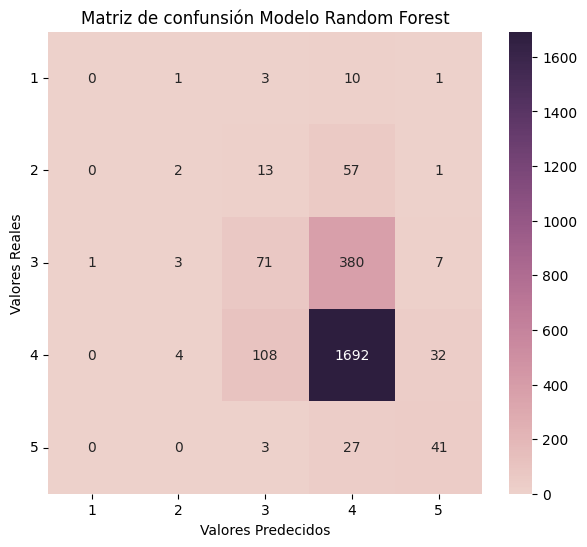

In [191]:
class_names = df["Rating"].sort_values().unique()
Prediccion = Rfc.predict(X_test)

matriz = confusion_matrix(y_test, Prediccion)

# Imprimimos la gráfica con la matriz de confusión:
plt.figure(figsize = (7,6))
sns.heatmap(matriz, annot=True, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True), xticklabels=class_names, yticklabels=class_names)
plt.yticks(rotation=0)
plt.xlabel("Valores Predecidos")
plt.ylabel("Valores Reales")
plt.title("Matriz de confunsión Modelo Random Forest")

In [192]:
# Imprimimos el reporte de clasificación:
print(classification_report(y_test, Prediccion))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        15
           2       0.20      0.03      0.05        73
           3       0.36      0.15      0.22       462
           4       0.78      0.92      0.85      1836
           5       0.50      0.58      0.54        71

    accuracy                           0.74      2457
   macro avg       0.37      0.34      0.33      2457
weighted avg       0.67      0.74      0.69      2457



Revisando los datos de accuracy o exactitud, se define con valor de 73% a los datos de testeo, es decir acertó en un 73 % de los datos. Tambien se aprecian los valores de f1-score por cada tipo de etiqueta de clasificacion, en la que valores bajos indican que el modelo no clasifica bien las clases, un valor de alto significa que clasifica bien en relacion a los valores que si son de esa clase respecto a los totales y como se aprecia para las 5 clases distintas en 3 de ellas tiene valores por debajo del 50% por lo que el modelo tiene un sesgo en clasificar para la clase numero 4, aunque se entiende ya que la mayoria de los datos de la variable target tienen la clase 4.

Para ver si el modelo puede mejorar, en cuanto a su exactitud y f1-score, se realizara tanto un tunning como un bagging, que se explicaran mas adelante.

Lo primero de esto es el tunning, el tunning es ajustar los hiperparametros de un modelo para que este logre un mejor resultado en categorizar los datos, los hiperparametros son los que se pueden modificar manualmente y los parametros son valores que el modelo asigna aleatoreamente, pero pueden ser "guiados" por los hiperparametros.
Para este caso el tipo de tunning que se utilizara es la busqueda bayesiana.

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END bootstrap=True, criterion=entropy, max_depth=3, min_samples_leaf=10, min_samples_split=11, n_estimators=186;, score=0.728 total time=   0.5s
[CV 2/3] END bootstrap=True, criterion=entropy, max_depth=3, min_samples_leaf=10, min_samples_split=11, n_estimators=186;, score=0.728 total time=   0.5s
[CV 3/3] END bootstrap=True, criterion=entropy, max_depth=3, min_samples_leaf=10, min_samples_split=11, n_estimators=186;, score=0.728 total time=   0.4s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END bootstrap=True, criterion=gini, max_depth=39, min_samples_leaf=18, min_samples_split=4, n_estimators=508;, score=0.732 total time=   1.9s
[CV 2/3] END bootstrap=True, criterion=gini, max_depth=39, min_samples_leaf=18, min_samples_split=4, n_estimators=508;, score=0.742 total time=   1.9s
[CV 3/3] END bootstrap=True, criterion=gini, max_depth=39, min_samples_leaf=18, min_samples_split=4, n_estimators=508;

Text(0.5, 1.0, 'Matriz de confunsión Modelo Random Forest con busqueda bayesiana')

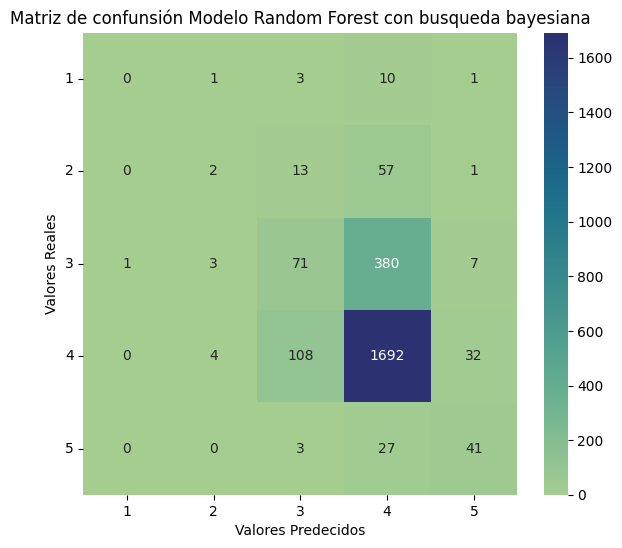

In [193]:
#Definimos los rangos y posibles valores para los parametros de random forest
param_grid = {
    'n_estimators': Integer(10, 1000),
    'max_depth': Integer(1, 50),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 20),
    'bootstrap': Categorical([True, False]),
    'criterion': Categorical(['gini', 'entropy'])
}

# Realizamos una búsqueda utilizando el algoritmo de optimización bayesiana de skopt:
n_iter_search = 20

bayes_search = BayesSearchCV(
    Rfc,  # Modelo creado con anterioridad
    param_grid,  # Espacios de búsqueda para los parámetros
    n_iter=n_iter_search,  # Número de iteraciones de búsqueda
    cv=3,  # Número de folds en la validación cruzada
    verbose=3  # Nivel de detalle durante el proceso de búsqueda
)

# Entrenamos el modelo a los datos de entrenamiento:
bayes_search.fit(X_train, y_train)

# Hacemos predicciones con el modelo ajustado:
bayes_predictions = bayes_search.predict(X_test)

# Imprimimos la matriz de confusión:
matriz_ = confusion_matrix(y_test, bayes_predictions)

class_names = df["Rating"].sort_values().unique() # Se difinen las etiquetas del mapa de calor

# Imprimimos la gráfica con la matriz de confusión:
plt.figure(figsize = (7,6))
sns.heatmap(matriz, annot=True, fmt='d', cmap="crest", xticklabels=class_names , yticklabels=class_names )
plt.yticks(rotation=0)
plt.xlabel("Valores Predecidos")
plt.ylabel("Valores Reales")
plt.title("Matriz de confunsión Modelo Random Forest con busqueda bayesiana")

In [194]:
# Imprimimos el reporte de clasificación:
print(classification_report(y_test, bayes_predictions))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        15
           2       0.00      0.00      0.00        73
           3       0.44      0.02      0.05       462
           4       0.76      0.98      0.86      1836
           5       0.46      0.52      0.49        71

    accuracy                           0.75      2457
   macro avg       0.33      0.30      0.28      2457
weighted avg       0.67      0.75      0.66      2457



En este entrenamiento subio en un 1% la Exactitud del modelo.

In [195]:
#Obtenemos los valores que dieron la presicion mas alta
bayes_search.best_estimator_

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=36,
                       min_samples_leaf=20, min_samples_split=13,
                       n_estimators=993)

Los hiperparametros que dieron los mejores resultados en la busqueda bayesiana son:

- criterion = 'entropy'
- max_depth = 17
- min_samples_leaf = 17
- min_samples_split = 4
- n_estimators = 867

Estos son los hiperparametros que usaremos para ingresar en el bagging. El bagging es un metodo para buscar un mejor resultado de los modelos, este entrena varios modelos en paralelo con algunas leves diferencias que al dar los resultados y en base a la moda de los mismos es la prediccion que dara de los datos.

Text(0.5, 1.0, 'Matriz de confunsión Modelo Random Forest con busqueda bayesiana')

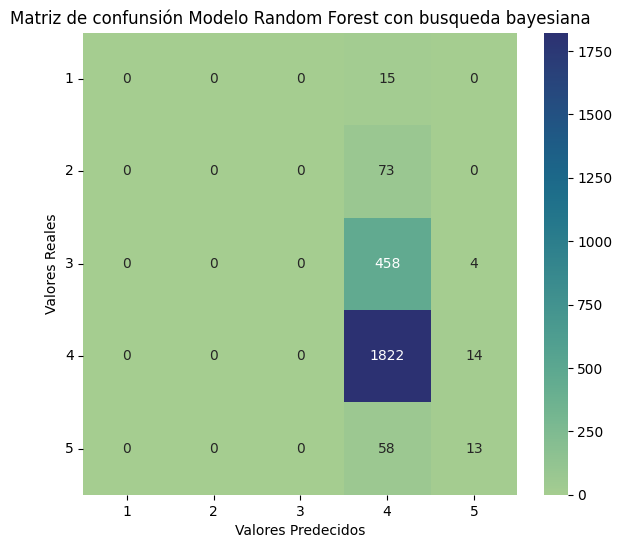

In [196]:
Rfc = BaggingClassifier(
    estimator=RandomForestClassifier(criterion='entropy', max_depth=16, min_samples_leaf=17, min_samples_split=4, n_estimators=867),
    n_estimators=100,
    max_samples=0.8,
    max_features=0.8,
    bootstrap=True,
    bootstrap_features=False,
    oob_score=True,
    random_state=3
)

#Se entrena el modelo con los datos de entramiento ya procesados
Rfc.fit(X_train, y_train)

# Hacemos predicciones con el modelo ajustado:
Prediccion = Rfc.predict(X_test)

# Imprimimos la matriz de confusión:
matriz = confusion_matrix(y_test, Prediccion)

#Se calcula de precision para mostrarla en la Api
acc = accuracy_score(y_test, Prediccion)

class_names = df["Rating"].sort_values().unique() # Se difinen las etiquetas del mapa de calor

# Imprimimos la gráfica con la matriz de confusión:
plt.figure(figsize = (7,6))
sns.heatmap(matriz, annot=True, fmt='d', cmap="crest", xticklabels=class_names , yticklabels=class_names )
plt.yticks(rotation=0)
plt.xlabel("Valores Predecidos")
plt.ylabel("Valores Reales")
plt.title("Matriz de confunsión Modelo Random Forest con busqueda bayesiana")

In [197]:
# Imprimimos el reporte de clasificación:
print(classification_report(y_test, Prediccion))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        15
           2       0.00      0.00      0.00        73
           3       0.00      0.00      0.00       462
           4       0.75      0.99      0.85      1836
           5       0.42      0.18      0.25        71

    accuracy                           0.75      2457
   macro avg       0.23      0.24      0.22      2457
weighted avg       0.57      0.75      0.65      2457



Viendo las metricas superiores, se puede decir que el bagging obtuvo una mejor exactitud o accuracy, llegando a su maximo de 75%.
Este es el modelo con el cual se utilizara para indentificar y categorizar las aplicaciones en el "API" asignada.

Se procede a guardar el modelo, el escalador y tambien el encoder por si es necesario realizar alguna conversion de los datos con los diccionarios

In [ ]:
# Se guarda el modelo generado y seleccionado

joblib.dump(Rfc, 'modelo.pkl')

# Guardar el escalador y el codificador por separado
joblib.dump(scaler, 'escalador.pkl')

joblib.dump(encoder_dict,"encoder.pkl")

#Tambien se guarda la precision del modelo
joblib.dump(acc,"acc.pkl")

['encoder.pkl']

Se usara el siguiente reguistro como ejemplo de ingreso de datos.

In [206]:
X.iloc[5882]


Category            FAMILY
Reviews              92010
Installs           1000000
Type                  Free
Price_usd              0.0
Content Rating    Everyone
Size_Mb                5.9
Updated Mes              7
Updated Año           2018
Name: 5882, dtype: object

In [205]:
y[5882]

np.int64(4)